#**Project 1: Mining information from Text Data**

This project will explore and analyze the information stored in a particular dataset. In this case the ACL Anthology dataset (https://aclanthology.org/). We will explore different techniques for obtainingn valuable information.

##**Contributors:** Md Karim Uddin (uddinmdk@arcada.fi), Navdeep Kaushish (kaushisn@arcada.fi), and Namrata Gupta (guptanam@arcada.fi)

#**Task 1: Finding Similar Items**
 
1. Randomly select 1000 abstracts from the whole dataset. Find the similar items using pairwise Jaccard similarities, MinHash and LSH (vectorized versions) .

2. Compare the performance in time and the results for k-shingles = 3, 5 and 10, for the three methods and similarity thresholds s=0.1 and 0.2. Use 50 hashing functions. Comment your results.

3. Compare the results obtained for MinHash and LSH for different similarity thresholds s = 0.1, 0.2 and 0.25 and 50, 100 and 200 hashing functions. Comment your results.


In [ ]:
# loading data
!wget https://aclanthology.org/anthology+abstracts.bib.gz
!gzip -d anthology+abstracts.bib.gz
!apt-get install -y bibutils
!apt-get install -y findutils
import os

# specify the file paths
old_file_path = 'anthology+abstracts.bib'
new_file_path = 'anthology+abstracts.txt'

# rename the file
os.rename(old_file_path, new_file_path)

# convert to txt using bib2txt
#!bib2txt -i anthology+abstracts.txt -o anthology+abstracts.txt

--2023-03-06 18:15:44--  https://aclanthology.org/anthology+abstracts.bib.gz
Resolving aclanthology.org (aclanthology.org)... 174.138.37.75
Connecting to aclanthology.org (aclanthology.org)|174.138.37.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19648087 (19M) [application/x-gzip]
Saving to: ‘anthology+abstracts.bib.gz’

anthology+abstracts 100%[===================>]  18.74M  --.-KB/s    in 0.1s    

2023-03-06 18:15:44 (131 MB/s) - ‘anthology+abstracts.bib.gz’ saved [19648087/19648087]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libbibutils6
The following NEW packages will be installed:
  bibutils libbibutils6
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 387 kB of archives.
After this operation, 2,727 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libbibutils6 am

In [ ]:
import os
import random

# Specify the input file and output folder paths
input_file_path = 'anthology+abstracts.txt'
output_folder_path = 'abstracts'

# Create the output folder if it doesn't already exist
os.makedirs(output_folder_path, exist_ok=True)

# Read the input file contents and split into abstracts
with open(input_file_path, 'r', encoding='utf-8') as f:
    data = f.read()
abstracts = data.split('@inproceedings')

# Remove the first empty element
abstracts.pop(0)

# Filter the abstracts to select those containing 'abstract = "'
selected_abstracts = [a for a in abstracts if 'abstract = "' in a]

# Randomly select 1000 abstracts
random_selected_abstracts = random.sample(selected_abstracts, k=min(1000, len(selected_abstracts)))

# Iterate over the selected abstracts and save them to individual files in the output folder
for i, abstract in enumerate(random_selected_abstracts):

    # Replace the string 'abstract = "' with 'abstract    :\n\n'
    abstract = abstract.replace('abstract = "', 'abstract    :\n\n')

    # Create the file path for the selected abstract
    file_path = os.path.join(output_folder_path, f'abstract_{i}.txt')
    # Write the modified contents to the output file
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(abstract.strip())


In [ ]:
# Not so important code 

#import shutil

# Compress the folder into a zip file
#shutil.make_archive('abstracts', 'zip', 'abstracts')

# Download the zip file
#from google.colab import files
#files.download('abstracts.zip')


In [ ]:
import numpy
import os
import re
import binascii
from time import time

def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("./abstracts"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [ ]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 1000


In [ ]:
from typing import Iterable
def get_shingles(fname, k):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r',errors='ignore') as f:
        # skip all lines until abstract
        for line in f:
            if "abstract    :\n"  in line:
                break

        # get abstract as a single string
        abstr = ' '.join([line[:-2].strip() for line in f])
        abstr = re.sub(' +', ' ', abstr)  # remove double spaces

        L = len(abstr)
        shingles = set()  # we use a set to automatically eliminate duplicates
        #shingles_original = set()
        for i in range(L-k+1):
            shingle = abstr[i:i+k]
            shingle = ' '.join(shingle)
            crc = binascii.crc32(shingle.encode('utf-8')) #& 0xffffffff  # hash the shingle to a 32-bit integer
            shingles.add(crc)
            #shingles_original.add(shingle)
            
        return shingles #, shingles_original

In [ ]:
fname = get_fnames()[10]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=3))))
print("number of shingles: {}".format(get_shingles(fname, k=3)))

file: ./abstracts/abstract_15.txt
number of shingles: 507
number of shingles: {1920915456, 2966347776, 1010767876, 118075398, 357984263, 780081160, 3213199369, 1062959115, 4121493522, 2918856735, 1484019743, 3571224612, 3321425959, 332916786, 1964077109, 1207351357, 1485901889, 3462207562, 2507089994, 2179643472, 1496977499, 1999061083, 541003871, 2059358306, 2611576932, 1144334437, 2543939686, 1250977900, 713674866, 1910761588, 913084535, 1304699000, 1354092669, 1075710084, 458475654, 169011336, 3158020238, 3747188882, 2517184664, 2702217372, 35012771, 444989607, 496459945, 864694441, 1578598571, 655335603, 3741790398, 2740996288, 3313576131, 2126029, 3593404623, 1311021267, 4207218899, 2160144597, 2941716696, 2188148958, 2734856414, 1090457825, 1569644772, 478431465, 1385752809, 2230124779, 4034150637, 761606384, 3768991984, 3665740018, 3149324534, 2115483896, 3165094136, 1441487097, 4168945925, 799303950, 3340685585, 1599103255, 3750840600, 2931087643, 1155455260, 192241955, 3512015

In [ ]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:10]: 
    sh = list(get_shingles(file, k=3))
    shingles_vectors.append(sh)

In [ ]:
def jaccard_similarity_score(x, y):
    """
    Jaccard Similarity J (A,B) = | Intersection (A,B) | /
                                    | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    if union_cardinality == 0:
        return 0
    else:
        return intersection_cardinality / float(union_cardinality)

jaccard_similarity_score(shingles_vectors[0], shingles_vectors[5])

0.20194647201946472

In [ ]:
%%time
import itertools

s = 0.1
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=3),get_shingles(pair[1], k=3))
    
    if js > s:
        print(pair)
        candidates.append(pair)

Streaming output truncated to the last 5000 lines.
('./abstracts/abstract_247.txt', './abstracts/abstract_740.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_407.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_525.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_94.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_951.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_217.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_463.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_517.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_195.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_361.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_600.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_594.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_418.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_105.txt')
('./abstracts/abstract_247.txt', './abst

In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 486081


In [ ]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.read()
    return data


In [ ]:
n = 100
print(read_file(candidates[n][0]))
print('')
print(read_file(candidates[n][1]))

{marek-etal-2021-oodgan,
    title = "{O}od{GAN}: Generative Adversarial Network for Out-of-Domain Data Generation",
    author = "Marek, Petr  and
      Naik, Vishal Ishwar  and
      Goyal, Anuj  and
      Auvray, Vincent",
    booktitle = "Proceedings of the 2021 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies: Industry Papers",
    month = jun,
    year = "2021",
    address = "Online",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2021.naacl-industry.30",
    doi = "10.18653/v1/2021.naacl-industry.30",
    pages = "238--245",
    abstract    :

Detecting an Out-of-Domain (OOD) utterance is crucial for a robust dialog system. Most dialog systems are trained on a pool of annotated OOD data to achieve this goal. However, collecting the annotated OOD data for a given domain is an expensive process. To mitigate this issue, previous works have proposed generative adv

In [ ]:
for pair in candidates:
    if read_file(pair[0]) != 'Not Available':
        print(pair)

Streaming output truncated to the last 5000 lines.
('./abstracts/abstract_247.txt', './abstracts/abstract_159.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_375.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_740.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_407.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_525.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_94.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_951.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_217.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_463.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_517.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_195.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_361.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_600.txt')
('./abstracts/abstract_247.txt', './abstracts/abstract_594.txt')
('./abstracts/abstract_247.txt', './abst

In [ ]:
print(read_file('./abstracts/abstract_901.txt'))
print('')
print(read_file('./abstracts/abstract_224.txt'))

{webson-etal-2020-undocumented,
    title = "Are {``}Undocumented Workers{''} the Same as {``}Illegal Aliens{''}? {D}isentangling Denotation and Connotation in Vector Spaces",
    author = "Webson, Albert  and
      Chen, Zhizhong  and
      Eickhoff, Carsten  and
      Pavlick, Ellie",
    booktitle = "Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP)",
    month = nov,
    year = "2020",
    address = "Online",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2020.emnlp-main.335",
    doi = "10.18653/v1/2020.emnlp-main.335",
    pages = "4090--4105",
    abstract    :

In politics, neologisms are frequently invented for partisan objectives. For example, {``}undocumented workers{''} and {``}illegal aliens{''} refer to the same group of people (i.e., they have the same denotation), but they carry clearly different connotations. Examples like these have traditionally posed a challenge to referen

In [ ]:
%%time
import itertools
# Changing similarity threshold to 0.2 for k=3
s = 0.2 
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=3),get_shingles(pair[1], k=3))
    
    if js > s:
        print(pair)
        candidates.append(pair)

Streaming output truncated to the last 5000 lines.
('./abstracts/abstract_399.txt', './abstracts/abstract_217.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_463.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_517.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_195.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_361.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_600.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_418.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_242.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_194.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_783.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_875.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_236.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_771.txt')
('./abstracts/abstract_399.txt', './abstracts/abstract_762.txt')
('./abstracts/abstract_399.txt', './abs

In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 316197


**Finding similar items with k-shingles=5 using method pairwise jaccard similarities**

In [ ]:
fname = get_fnames()[10]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=5))))
print("number of shingles: {}".format(get_shingles(fname, k=5)))

file: ./abstracts/abstract_15.txt
number of shingles: 647
number of shingles: {873220103, 4007526416, 3037650960, 3906422800, 2832996371, 1005176860, 2310819876, 3513157669, 3570866214, 3029276717, 369958961, 3779567669, 2371921973, 465561655, 3659870267, 547399739, 1800843325, 2566764607, 1510197314, 1742073923, 106002500, 3194189893, 2304671812, 644876365, 2329149518, 3709972560, 264204369, 215617527, 3608985687, 3393542233, 3639660638, 1324976228, 746868837, 570493028, 1878288486, 3518341224, 3636080749, 4240699506, 2287206516, 2130880635, 682328191, 958208129, 1764216964, 3221897349, 48801934, 400861331, 4038445205, 2533326999, 1554038938, 1317419162, 1275166878, 2621415591, 395747496, 3892844716, 2586640567, 2354297016, 3075332283, 1928888514, 4267839682, 1505429702, 651563206, 1393971405, 4121530573, 2777630927, 3841958099, 63031507, 3315976411, 3206398172, 646113501, 1872621792, 3899103461, 670449895, 2839967976, 2975324395, 927068397, 3713059060, 909754615, 3509940479, 55061939

In [ ]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:10]: 
    sh = list(get_shingles(file, k=5))
    shingles_vectors.append(sh)

In [ ]:
def jaccard_similarity_score(x, y):
    """
    Jaccard Similarity J (A,B) = | Intersection (A,B) | /
                                    | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    if union_cardinality == 0:
        return 0
    else:
        return intersection_cardinality / float(union_cardinality)

jaccard_similarity_score(shingles_vectors[0], shingles_vectors[5])

0.04900459418070444

In [ ]:
%%time
import itertools

s = 0.1
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=5),get_shingles(pair[1], k=5))
    
    if js > s:
        print(pair)
        candidates.append(pair)

('./abstracts/abstract_363.txt', './abstracts/abstract_88.txt')
('./abstracts/abstract_363.txt', './abstracts/abstract_795.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_983.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_900.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_453.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_514.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_340.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_5.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_969.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_203.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_35.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_990.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_875.txt')
('./abstracts/abstract_995.txt', './abstracts/abstract_876.txt')
('./abstracts/abstract_995.txt', './abstracts/abstract_241.txt')
('./abstracts/abstract_995.tx

In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 4026


**Changing similarity threshold to 0.2 for k-shingles=5 for pairwise jaccard similarity method**

In [ ]:
%%time
import itertools

s = 0.2
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=5),get_shingles(pair[1], k=5))
    
    if js > s:
        print(pair)
        candidates.append(pair)

('./abstracts/abstract_363.txt', './abstracts/abstract_88.txt')
('./abstracts/abstract_363.txt', './abstracts/abstract_795.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_983.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_900.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_453.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_514.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_340.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_5.txt')
('./abstracts/abstract_103.txt', './abstracts/abstract_969.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_203.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_35.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_990.txt')
('./abstracts/abstract_847.txt', './abstracts/abstract_875.txt')
('./abstracts/abstract_995.txt', './abstracts/abstract_876.txt')
('./abstracts/abstract_995.txt', './abstracts/abstract_241.txt')
('./abstracts/abstract_995.tx

In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 4026


**Finding similar items with k_shingles=10**

In [ ]:
fname = get_fnames()[10]
print("file: {}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=10))))
print("number of shingles: {}".format(get_shingles(fname, k=10)))

file: ./abstracts/abstract_15.txt
number of shingles: 716
number of shingles: {4197910528, 1531475977, 1061890060, 2465712144, 839268378, 2917691418, 3443185691, 3933114398, 1765503010, 1122142243, 1284042788, 1329934377, 2682101806, 2816086067, 3231551542, 1808607289, 2800564292, 1093107785, 1388249162, 3788253259, 1688418382, 1683712078, 1940807762, 267425879, 4026204249, 1375934554, 3414278235, 175036507, 1893552219, 553865313, 2658930785, 3037124709, 1421334633, 980605037, 3205552237, 3273642107, 1497467003, 2222565506, 1287301254, 234811526, 1802915976, 2847387786, 2714155156, 1777420437, 399630486, 3302819990, 4019804327, 1976926377, 2533869740, 3745474733, 3401986222, 3855458480, 1077708978, 3183712443, 2919022782, 866863300, 3436329159, 894120135, 3335282889, 2489333963, 562905292, 2659713230, 1918322896, 2122834128, 776417490, 3098859737, 2879062233, 2999722201, 3014254831, 1142120688, 138885361, 425693430, 4011204855, 267974906, 871119100, 4282370301, 497408252, 1831960836, 1

In [ ]:
fnames = get_fnames()
shingles_vectors = []

for file in fnames[:10]: 
    sh = list(get_shingles(file, k=10))
    shingles_vectors.append(sh)

In [ ]:
def jaccard_similarity_score(x, y):
    """
    Jaccard Similarity J (A,B) = | Intersection (A,B) | /
                                    | Union (A,B) |
    """
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    if union_cardinality == 0:
        return 0
    else:
        return intersection_cardinality / float(union_cardinality)

jaccard_similarity_score(shingles_vectors[0], shingles_vectors[5])

0.00245398773006135

In [ ]:
%%time
import itertools

s = 0.1
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=10),get_shingles(pair[1], k=10))
    
    if js > s:
        print(pair)
        candidates.append(pair)

('./abstracts/abstract_958.txt', './abstracts/abstract_714.txt')
('./abstracts/abstract_402.txt', './abstracts/abstract_832.txt')
CPU times: user 20min 25s, sys: 24.3 s, total: 20min 50s
Wall time: 21min


In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 2


**Changing s=0.2 for k=10 for jaccard similarites method**

In [ ]:
%%time
import itertools

s = 0.2
candidates = []

fnames = get_fnames()
for pair in itertools.combinations(fnames,2):
    js = jaccard_similarity_score(get_shingles(pair[0], k=10),get_shingles(pair[1], k=10))
    
    if js > s:
        print(pair)
        candidates.append(pair)

CPU times: user 20min 16s, sys: 23.9 s, total: 20min 40s
Wall time: 20min 50s


In [ ]:
print("Number of similar items: {}".format(len(candidates)))

Number of similar items: 0


## **Finding similar items using MinHash**

In [ ]:
# set global parameters to process the whole dataset
bands = 10
rows = 5
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)
B = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)

In [ ]:
print(len(A),A)

50 [1080890890 3105953141  596476924  205099140  121771404 1760555103
 1011916194  466945477 2335419789 1287406434  606674758 1687038714
  385874730  107866403   30757852 3962822624 2937259235  740398017
 2483618833  655889223 4221531386 4288865373 4076108138 1066175440
  212472144 3341485334  623557576 2355131913 2825335050 2383517579
   73223230 1749194151 2646423551 2248610134 2123928039  244508858
 2665876543 3875854727  440759698  512193988 2598649343  497062955
 2643949709  841528929 2098789456 3131330353 1944092399 2637593870
  342682388  634385427]


In [ ]:
# fast implementation of Minhash algorithm
# computes all random hash functions for a shingle at once, using vector operations
# also finds element-wise minimum of two vectors efficiently
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

In [ ]:
fname = get_fnames()[0]
shingles = get_shingles(fname, k=3)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))

signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 50 , [ 1660366.   512891.  9669851.  4188280.  8573633.  7905445.  2210605.
  2829085.  3467063. 15389667. 12640590.  3265457.  7920218.  5104544.
 11714616.  5270891. 17204308.  5301637.   318271. 10326947.  8583846.
 30846491.  1149614.  1423173.  2131105.  7281867.  2401186.   443171.
  6795687.  7998733.  9544003.  1316487.  6897357.  7176574. 11989038.
  2310101.  4422684. 20377853. 24344578. 17064195.  6749308.  8523264.
  6036140. 12697520.  8236455.  4858243.  2661485.  5322317. 24675072.
  8914360.]


In [ ]:
fname = get_fnames()[1]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=3))))

file:./abstracts/abstract_103.txt
number of shingles: 266


In [ ]:
ShingleID = list(get_shingles(fname, k=3))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 805408259
its hash code by first hash function: 1221203175
its hash code by second hash function: 3631873603


In [ ]:
# time fast minhash function takes to execute
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=3))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("code took {} seconds".format(t2))

signatures_all_files_2 = numpy.array(signatures_all_files_2)

code took 5.269717454910278 seconds


In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=3, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./abstracts/abstract_980.txt ./abstracts/abstract_59.txt
./abstracts/abstract_980.txt ./abstracts/abstract_773.txt
./abstracts/abstract_980.txt ./abstracts/abstract_885.txt
./abstracts/abstract_980.txt ./abstracts/abstract_732.txt
./abstracts/abstract_980.txt ./abstracts/abstract_666.txt
./abstracts/abstract_980.txt ./abstracts/abstract_167.txt
./abstracts/abstract_980.txt ./abstracts/abstract_376.txt
./abstracts/abstract_980.txt ./abstracts/abstract_458.txt
./abstracts/abstract_980.txt ./abstracts/abstract_844.txt
./abstracts/abstract_980.txt ./abstracts/abstract_997.txt
./abstracts/abstract_980.txt ./abstracts/abstract_898.txt
./abstracts/abstract_980.txt ./abstracts/abstract_447.txt
./abstracts/abstract_980.txt ./abstracts/abstract_541.txt
./abstracts/abstract_980.txt ./abstracts/abstract_208.txt
./abstracts/abstract_980.txt ./abstracts/abstract_382.txt
./abstracts/abstract_980.txt ./abstracts/abstract_49.txt
./abstracts/abstract_98

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 319.44017148017883 seconds
found 463862 candidates


In [ ]:
signatures = numpy.array(signatures).T
print(signatures.shape)

(50, 1000)


#Finding similar items using minhash hashing function=50, k=3, s= 0.2

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./abstracts/abstract_56.txt ./abstracts/abstract_188.txt
./abstracts/abstract_56.txt ./abstracts/abstract_114.txt
./abstracts/abstract_56.txt ./abstracts/abstract_980.txt
./abstracts/abstract_56.txt ./abstracts/abstract_926.txt
./abstracts/abstract_56.txt ./abstracts/abstract_247.txt
./abstracts/abstract_56.txt ./abstracts/abstract_694.txt
./abstracts/abstract_56.txt ./abstracts/abstract_429.txt
./abstracts/abstract_56.txt ./abstracts/abstract_219.txt
./abstracts/abstract_56.txt ./abstracts/abstract_2.txt
./abstracts/abstract_56.txt ./abstracts/abstract_401.txt
./abstracts/abstract_56.txt ./abstracts/abstract_325.txt
./abstracts/abstract_56.txt ./abstracts/abstract_360.txt
./abstracts/abstract_56.txt ./abstracts/abstract_940.txt
./abstracts/abstract_56.txt ./abstracts/abstract_669.txt
./abstracts/abstract_56.txt ./abstracts/abstract_285.txt
./abstracts/abstract_56.txt ./abstracts/abstract_676.txt
./abstracts/abstract_56.txt ./abstracts

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 173.79042100906372 seconds
found 252165 candidates


In [ ]:
signatures = numpy.array(signatures).T
print(signatures.shape)

(50, 1000)


##Changing k=5 with hash function 50

In [ ]:
fname = get_fnames()[0]
shingles = get_shingles(fname, k=5)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))

signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 50 , [ 4381375.  1784572.  1511695. 13078903.   663684.  5344935.  5513484.
  2043410.  7324767. 17726259.  5985288.  3044785.   677481.  8071633.
  5034772.  4378388.  2078045.  5381416.  3317369.  1135104.  1619174.
  3814391.  7483314.   758062.  2498684.  2471227.  9145768.  1276776.
   526462. 17754096.  1174815.  6568268. 23339934.  5337032.  8931635.
   954957.  1631265.  7625701.  7293679.  7387322.  5313168. 21692896.
  1302667.  4568750.  5988826.  1720954.  2462897.  1567910.   846978.
  2818447.]


In [ ]:
fname = get_fnames()[1]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=5))))

file:./abstracts/abstract_103.txt
number of shingles: 325


In [ ]:
ShingleID = list(get_shingles(fname, k=5))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 1265246223
its hash code by first hash function: 2065117786
its hash code by second hash function: 148580321


In [ ]:
# time fast minhash function takes to execute
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=5))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("code took {} seconds".format(t2))

signatures_all_files_2 = numpy.array(signatures_all_files_2)

code took 8.37208080291748 seconds


In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=5, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./abstracts/abstract_881.txt ./abstracts/abstract_771.txt
./abstracts/abstract_881.txt ./abstracts/abstract_478.txt
./abstracts/abstract_881.txt ./abstracts/abstract_24.txt
./abstracts/abstract_881.txt ./abstracts/abstract_59.txt
./abstracts/abstract_881.txt ./abstracts/abstract_773.txt
./abstracts/abstract_881.txt ./abstracts/abstract_376.txt
./abstracts/abstract_881.txt ./abstracts/abstract_617.txt
./abstracts/abstract_881.txt ./abstracts/abstract_224.txt
./abstracts/abstract_711.txt ./abstracts/abstract_912.txt
./abstracts/abstract_711.txt ./abstracts/abstract_279.txt
./abstracts/abstract_711.txt ./abstracts/abstract_707.txt
./abstracts/abstract_711.txt ./abstracts/abstract_607.txt
./abstracts/abstract_711.txt ./abstracts/abstract_815.txt
./abstracts/abstract_711.txt ./abstracts/abstract_258.txt
./abstracts/abstract_711.txt ./abstracts/abstract_2.txt
./abstracts/abstract_711.txt ./abstracts/abstract_325.txt
./abstracts/abstract_711.

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 68.48130464553833 seconds
found 91685 candidates


###Changing threshold to 0.2 for k=5

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=5, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_363.txt ./abstracts/abstract_388.txt
./abstracts/abstract_158.txt ./abstracts/abstract_379.txt
./abstracts/abstract_892.txt ./abstracts/abstract_567.txt
./abstracts/abstract_892.txt ./abstracts/abstract_608.txt
./abstracts/abstract_892.txt ./abstracts/abstract_46.txt
./abstracts/abstract_892.txt ./abstracts/abstract_890.txt
./abstracts/abstract_892.txt ./abstracts/abstract_304.txt
./abstracts/abstract_892.txt ./abstracts/abstract_785.txt
./abstracts/abstract_892.txt ./abstracts/abstract_358.txt
./abstracts/abstract_741.txt ./abstracts/abstract_138.txt
./abstracts/abstract_239.txt ./abstracts/abstract_730.txt
./abstracts/abstract_239.txt ./abstracts/abstract_488.txt
./abstracts/abstract_239.txt ./abstracts/abstract_284.txt
./abstracts/abstract_435.txt ./abstracts/abstract_563.txt
./abstracts/abstract_435.txt ./abstracts/abstract_773.txt
./abstracts/abstract_602.txt ./abstracts/abstract_945.txt
./abstracts/abstract_81.txt ./abstr

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 7.473195314407349 seconds
found 854 candidates


##Changing k-shingles to 10 with hashing function=50

In [ ]:
fname = get_fnames()[0]
shingles = get_shingles(fname, k=10)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))

signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 50 , [ 5967885.   607630. 12412407. 15570028.   328639.  4582722. 18818961.
  6856477.  4763991.  6118351. 14674095. 25209410.  6481962.  4647367.
   325749.  2209808.  1473045.  8984216.  5751359.  3287194.  7281816.
   180285.  1977323.   182940.  7538542.  7548357. 10330880.   263152.
  3468703.  2109320.  8583155.  2085474.   389930.  3249768.  1426956.
  4894082.  5212335.   887278.  3253472.   957188.  2168031.   741144.
  2504107.  1876063.  3047242.  2280603.  1597028.    60891. 15864970.
 13031968.]


In [ ]:
fname = get_fnames()[1]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=10))))

file:./abstracts/abstract_103.txt
number of shingles: 353


In [ ]:
ShingleID = list(get_shingles(fname, k=10))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 449908738
its hash code by first hash function: 2466322136
its hash code by second hash function: 644167038


In [ ]:
# time fast minhash function takes to execute
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=10))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("code took {} seconds".format(t2))

signatures_all_files_2 = numpy.array(signatures_all_files_2)

code took 10.087799072265625 seconds


In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=10, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_363.txt ./abstracts/abstract_412.txt
./abstracts/abstract_158.txt ./abstracts/abstract_115.txt
./abstracts/abstract_158.txt ./abstracts/abstract_714.txt
./abstracts/abstract_158.txt ./abstracts/abstract_12.txt
./abstracts/abstract_81.txt ./abstracts/abstract_429.txt
./abstracts/abstract_876.txt ./abstracts/abstract_85.txt
./abstracts/abstract_225.txt ./abstracts/abstract_456.txt
./abstracts/abstract_788.txt ./abstracts/abstract_702.txt
./abstracts/abstract_187.txt ./abstracts/abstract_911.txt
./abstracts/abstract_749.txt ./abstracts/abstract_46.txt
./abstracts/abstract_331.txt ./abstracts/abstract_899.txt
./abstracts/abstract_331.txt ./abstracts/abstract_373.txt
./abstracts/abstract_113.txt ./abstracts/abstract_998.txt
./abstracts/abstract_113.txt ./abstracts/abstract_302.txt
./abstracts/abstract_88.txt ./abstracts/abstract_989.txt
./abstracts/abstract_88.txt ./abstracts/abstract_258.txt
./abstracts/abstract_60.txt ./abstracts/

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 6.3544182777404785 seconds
found 132 candidates


In [ ]:
signatures = numpy.array(signatures).T
print(signatures.shape)

(50, 1000)


In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=10, s= 0.2

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 7.391646385192871 seconds
found 3 candidates


#**Finding similar items with LSH**

#Finding similar tems with LSH using 50 hashing function k-shingles=3 and s=0.1

In [ ]:
# defining LSH function
def LSH(signatures, bands, rows, Ab, Bb, nextPrime, maxShingleID):
    """Locality Sensitive Hashing
    """
    numItems = signatures.shape[1]
    signBands = numpy.array_split(signatures, bands, axis=0)
    candidates = set()
    for nb in range(bands):
        hashTable = {}
        for ni in range(numItems):
            item = signBands[nb][:,ni]
            hash = (numpy.dot(Ab[nb,:], item) + Bb[nb]) % nextPrime % maxShingleID
            if hash not in hashTable:
                hashTable[hash] = [ni]
            else:
                hashTable[hash].append(ni)
        for _,items in hashTable.items():
            if len(items) > 1:
                L = len(items)
                for i in range(L-1):
                    for j in range(i+1, L):
                        cand = [items[i], items[j]]
                        numpy.sort(cand)
                        candidates.add(tuple(cand))
    return candidates

In [ ]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.1  
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.23229074478149414 seconds
found 1064 candidates
candidate similar pairs of files are:
./abstracts/abstract_277.txt ./abstracts/abstract_266.txt
./abstracts/abstract_27.txt ./abstracts/abstract_191.txt
./abstracts/abstract_691.txt ./abstracts/abstract_378.txt
./abstracts/abstract_960.txt ./abstracts/abstract_401.txt
./abstracts/abstract_29.txt ./abstracts/abstract_890.txt
./abstracts/abstract_19.txt ./abstracts/abstract_285.txt
./abstracts/abstract_301.txt ./abstracts/abstract_737.txt
./abstracts/abstract_69.txt ./abstracts/abstract_727.txt
./abstracts/abstract_683.txt ./abstracts/abstract_625.txt
./abstracts/abstract_211.txt ./abstracts/abstract_758.txt
./abstracts/abstract_384.txt ./abstracts/abstract_65.txt
./abstracts/abstract_533.txt ./abstracts/abstract_559.txt
./abstracts/abstract_820.txt ./abstracts/abstract_64.txt
./abstracts/abstract_675.txt ./abstracts/abstract_258.txt
./abstracts/abstract_449.txt ./abstracts/abstract_418.txt
./abstracts/abstract_860

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.9993000030517578 seconds
found 1064 candidates


##Changing s=0.2 with k=3 and 50 hashing functions

In [ ]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=3)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.2 
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.05676627159118652 seconds
found 1064 candidates
candidate similar pairs of files are:
./abstracts/abstract_277.txt ./abstracts/abstract_266.txt
./abstracts/abstract_27.txt ./abstracts/abstract_191.txt
./abstracts/abstract_691.txt ./abstracts/abstract_378.txt
./abstracts/abstract_960.txt ./abstracts/abstract_401.txt
./abstracts/abstract_29.txt ./abstracts/abstract_890.txt
./abstracts/abstract_19.txt ./abstracts/abstract_285.txt
./abstracts/abstract_301.txt ./abstracts/abstract_737.txt
./abstracts/abstract_69.txt ./abstracts/abstract_727.txt
./abstracts/abstract_683.txt ./abstracts/abstract_625.txt
./abstracts/abstract_211.txt ./abstracts/abstract_758.txt
./abstracts/abstract_384.txt ./abstracts/abstract_65.txt
./abstracts/abstract_533.txt ./abstracts/abstract_559.txt
./abstracts/abstract_820.txt ./abstracts/abstract_64.txt
./abstracts/abstract_675.txt ./abstracts/abstract_258.txt
./abstracts/abstract_449.txt ./abstracts/abstract_418.txt
./abstracts/abstract_860

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.8318965435028076 seconds
found 1064 candidates


###Changing k=5 for same number of hashing function i.e 50 with s=0.1

In [ ]:
# find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.1  
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.09407925605773926 seconds
found 7 candidates
candidate similar pairs of files are:
./abstracts/abstract_15.txt ./abstracts/abstract_593.txt
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_856.txt ./abstracts/abstract_6.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt
./abstracts/abstract_938.txt ./abstracts/abstract_677.txt
./abstracts/abstract_563.txt ./abstracts/abstract_819.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt


In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.13141703605651855 seconds
found 7 candidates


##Changing s=0.2 for LSH method with k=5 and 50 hashing functions

In [ ]:
#find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.2 
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.06013607978820801 seconds
found 7 candidates
candidate similar pairs of files are:
./abstracts/abstract_15.txt ./abstracts/abstract_593.txt
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_856.txt ./abstracts/abstract_6.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt
./abstracts/abstract_938.txt ./abstracts/abstract_677.txt
./abstracts/abstract_563.txt ./abstracts/abstract_819.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt


In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.0789644718170166 seconds
found 7 candidates


##Changing K-shingles to 10 

##Similarity threshold =0.1, K=10

In [ ]:
#find candidates with LSH

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.1
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.06042766571044922 seconds
found 3 candidates
candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.07641816139221191 seconds
found 3 candidates


changing similarity threshold to 0.2

In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.2
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.052759408950805664 seconds
found 3 candidates
candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.07203149795532227 seconds
found 3 candidates


#Minhash and LSH methods with hashing function 100 and different similarity thresholds and k-shingles=5



In [ ]:
# change global parameters to process the whole dataset
bands = 10
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)
B = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=100, k=10, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./abstracts/abstract_565.txt ./abstracts/abstract_124.txt
./abstracts/abstract_565.txt ./abstracts/abstract_758.txt
./abstracts/abstract_565.txt ./abstracts/abstract_479.txt
./abstracts/abstract_565.txt ./abstracts/abstract_330.txt
./abstracts/abstract_565.txt ./abstracts/abstract_555.txt
./abstracts/abstract_565.txt ./abstracts/abstract_693.txt
./abstracts/abstract_565.txt ./abstracts/abstract_335.txt
./abstracts/abstract_565.txt ./abstracts/abstract_375.txt
./abstracts/abstract_565.txt ./abstracts/abstract_195.txt
./abstracts/abstract_565.txt ./abstracts/abstract_361.txt
./abstracts/abstract_565.txt ./abstracts/abstract_242.txt
./abstracts/abstract_565.txt ./abstracts/abstract_762.txt
./abstracts/abstract_565.txt ./abstracts/abstract_24.txt
./abstracts/abstract_565.txt ./abstracts/abstract_358.txt
./abstracts/abstract_565.txt ./abstracts/abstract_396.txt
./abstracts/abstract_565.txt ./abstracts/abstract_167.txt
./abstracts/abstract_5

In [ ]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 40.668609380722046 seconds
found 51023 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.1
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.05629420280456543 seconds
found 3 candidates
candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.05629420280456543 seconds
found 3 candidates


With k=5, hashing function=100 and s=0.1, minhash method took 40.668 seconds, and found 51023 candidates and FOr same parameters LSH method took 0.05 seconds and found 3 candidate. It shows that LSH method is pretty faster as compared to Minhash But Minhash gives more results for candidates.

###Similarity threshold to 0.2 for both the methods with same hashing function i.e. 100

In [ ]:
### Now changing similarity threshold to 0.2 for both the methods with same hashing function i.e. 100

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=100, k=5, s= 0.2

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_995.txt ./abstracts/abstract_510.txt
./abstracts/abstract_892.txt ./abstracts/abstract_785.txt
./abstracts/abstract_730.txt ./abstracts/abstract_627.txt
./abstracts/abstract_876.txt ./abstracts/abstract_634.txt
./abstracts/abstract_144.txt ./abstracts/abstract_716.txt
./abstracts/abstract_187.txt ./abstracts/abstract_39.txt
./abstracts/abstract_187.txt ./abstracts/abstract_911.txt
./abstracts/abstract_319.txt ./abstracts/abstract_734.txt
./abstracts/abstract_319.txt ./abstracts/abstract_773.txt
./abstracts/abstract_240.txt ./abstracts/abstract_673.txt
./abstracts/abstract_241.txt ./abstracts/abstract_954.txt
./abstracts/abstract_241.txt ./abstracts/abstract_340.txt
./abstracts/abstract_434.txt ./abstracts/abstract_352.txt
./abstracts/abstract_172.txt ./abstracts/abstract_668.txt
./abstracts/abstract_934.txt ./abstracts/abstract_516.txt
./abstracts/abstract_981.txt ./abstracts/abstract_952.txt
./abstracts/abstract_415.txt ./abst

In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.05629420280456543 seconds
found 66 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.2
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))
print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

finding candidates took 0.0614008903503418 seconds
found 3 candidates
candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.0614008903503418 seconds
found 3 candidates


Minhash method took 0.056seconds and found 66 candidates for hashing function 100 and s=0.2. on other side, LSH took 0.06 seconds found 3 candidates. Concluding, LSH is faster than minhash as  we increase similarity threshold LSH is also performing well for finding similar candidates. As we increase s, Minhash speeds up more giving better performance.

##Similarity threshold to 0.25 for both the methods with same hashing function i.e. 100

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=100, k=5, s= 0.25

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.25  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_241.txt ./abstracts/abstract_340.txt
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.0614008903503418 seconds
found 4 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.25
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.052808523178100586 seconds
found 3 candidates


Minhash method took 0.06 seconds and found 4 candidates and LSH took took 0.05 seconds found 3 candidates. SO as we increase value of s, performance of minhash method increases. Both methods took almost same time and minhash found more similar candidates.

##Minhash method and LSH method with HAshing function to 200 with different similarity threshold

In [ ]:
# Let's reset bandwidth to 200
# change global parameters to process the whole dataset
bands = 20
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)
B = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=200, k=5, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

Streaming output truncated to the last 5000 lines.
./abstracts/abstract_110.txt ./abstracts/abstract_111.txt
./abstracts/abstract_110.txt ./abstracts/abstract_30.txt
./abstracts/abstract_110.txt ./abstracts/abstract_815.txt
./abstracts/abstract_110.txt ./abstracts/abstract_139.txt
./abstracts/abstract_110.txt ./abstracts/abstract_395.txt
./abstracts/abstract_110.txt ./abstracts/abstract_67.txt
./abstracts/abstract_110.txt ./abstracts/abstract_215.txt
./abstracts/abstract_110.txt ./abstracts/abstract_568.txt
./abstracts/abstract_110.txt ./abstracts/abstract_188.txt
./abstracts/abstract_110.txt ./abstracts/abstract_145.txt
./abstracts/abstract_110.txt ./abstracts/abstract_513.txt
./abstracts/abstract_110.txt ./abstracts/abstract_236.txt
./abstracts/abstract_110.txt ./abstracts/abstract_281.txt
./abstracts/abstract_110.txt ./abstracts/abstract_885.txt
./abstracts/abstract_110.txt ./abstracts/abstract_447.txt
./abstracts/abstract_637.txt ./abstracts/abstract_945.txt
./abstracts/abstract_63

In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.052808523178100586 seconds
found 14041 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.1
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.10540056228637695 seconds
found 3 candidates


Change similarity threshold to 0.2

In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=200, k=5, s= 0.2

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.2 # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_564.txt ./abstracts/abstract_79.txt
./abstracts/abstract_803.txt ./abstracts/abstract_279.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt
./abstracts/abstract_258.txt ./abstracts/abstract_219.txt
./abstracts/abstract_677.txt ./abstracts/abstract_396.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.10540056228637695 seconds
found 7 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.2
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.10472512245178223 seconds
found 3 candidates


Changing s=0.25 for hashing function=200


In [ ]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=200, k=5, s= 0.25

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.25 # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.10472512245178223 seconds
found 3 candidates


In [ ]:
#find candidates with LSH 

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=5)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

# prepare data for LSH
A2 = numpy.random.randint(0, nextPrime/2, size=(bands, rows))  # now we need a vector of A parameters for each band
B2 = numpy.random.randint(0, nextPrime/2, size=(bands, ))
signatures = numpy.array(signatures).T  # LSH needs a matrix of signatures, not a list of vectors

s = 0.25
Nfiles = signatures.shape[1]  # number of different files
t = time()
candidates = LSH(signatures, bands, rows, A2, B2, nextPrime, maxShingleID)
t2 = time() - t

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
./abstracts/abstract_309.txt ./abstracts/abstract_332.txt
./abstracts/abstract_309.txt ./abstracts/abstract_731.txt
./abstracts/abstract_332.txt ./abstracts/abstract_731.txt


In [ ]:
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 0.10231590270996094 seconds
found 3 candidates


#**Task 2: Mining information from Text Data**
 
Using the whole anthologies abstract dataset. Extract a list of the authors and editors per publication and create baskets and perform a search of similar items, for example:

basket 1: Mostafazadeh Davani Aida,Kiela Douwe,Lambert Mathias,Vidgen, Bertie Prabhakaran Vinodkumar, Waseem, Zeerak
basket 2: Singh Sumer, Li Sheng
 
1. Find the frequent pair of items (2-tuples) using the naïve, A-priori and PCY algorithms. For each of these compare the time of execution and results for supports s=10, 50, 100. Comment your results.

2. For the PCY algorithm, create up to 5 compact hash tables. What is the difference in results and time of execution for 1,2,3,4 and 5 tables? Comment your results.

3. Find the final list of k-frequent items (k-tuples) for k=3 and 4. Experiment a bit and describe the best value for the support in each case. 

In [1]:
#Loading data
!wget https://aclanthology.org/anthology+abstracts.bib.gz
!gzip -d anthology+abstracts.bib.gz
!apt-get install -y bibutils
!apt-get install -y findutils
import os

# specify the file paths
old_file_path = 'anthology+abstracts.bib'
new_file_path = 'anthology+abstracts.txt'

# rename the file
os.rename(old_file_path, new_file_path)

--2023-03-12 17:03:02--  https://aclanthology.org/anthology+abstracts.bib.gz
Resolving aclanthology.org (aclanthology.org)... 174.138.37.75
Connecting to aclanthology.org (aclanthology.org)|174.138.37.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19650190 (19M) [application/x-gzip]
Saving to: ‘anthology+abstracts.bib.gz’

anthology+abstracts 100%[===================>]  18.74M  22.3MB/s    in 0.8s    

2023-03-12 17:03:03 (22.3 MB/s) - ‘anthology+abstracts.bib.gz’ saved [19650190/19650190]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libbibutils6
The following NEW packages will be installed:
  bibutils libbibutils6
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 387 kB of archives.
After this operation, 2,727 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libbibutils6 a

In [2]:
import re

# read in the contents of the file
with open('anthology+abstracts.txt', 'r') as f:
    data = f.read()

# define regex patterns to match author and editor names
author_pattern = r'author\s*=\s*"([^"]+)"'
editor_pattern = r'editor\s*=\s*"([^"]+)"'

# find all occurrences of author and editor names in the text
authors = re.findall(author_pattern, data)
editors = re.findall(editor_pattern, data)

# combine authors and editors into a single list of names
names = authors + editors

# write authors to a file with a space instead of newline after each line
with open('authors.txt', 'w') as f:
    for author in authors:
        author = re.sub(r'\s+', ' ', author.replace('\n', ' '))
        f.write(author + '\n\n')
        
# write editors to a file with a space instead of newline after each line
with open('editors.txt', 'w') as f:
    for editor in editors:
        editor = re.sub(r'\s+', ' ', editor.replace('\n', ' '))
        f.write(editor + '\n\n')

# write names to a file with an empty line after each line
with open('names.txt', 'w') as f:
    for name in names:
        f.write(name + '\n\n')


In [3]:
# set text encoding for reading a file,
# because Python 3 supports all languages with unicode
with open("names.txt", "rt", encoding='latin1') as f:
    lines = f.readlines()

lines = [l.replace('\n', '') for l in lines]

for l in lines[:20]:
    print(l)

Krishna, Amrith  and
      Gupta, Ashim  and
      Garasangi, Deepak  and
      Sandhan, Jeevnesh  and
      Satuluri, Pavankumar  and
      Goyal, Pawan

Sandhan, Jivnesh  and
      Paranjay, Om Adideva  and
      Digumarthi, Komal  and
      Behra, Laxmidhar  and
      Goyal, Pawan

Sriram, Krishnan  and
      Kulkarni, Amba  and
      Huet, G{\'e}rard

Sujoy, Sarkar  and
      Krishna, Amrith  and
      Goyal, Pawan


In [4]:
lines[1:20]

['      Gupta, Ashim  and',
 '      Garasangi, Deepak  and',
 '      Sandhan, Jeevnesh  and',
 '      Satuluri, Pavankumar  and',
 '      Goyal, Pawan',
 '',
 'Sandhan, Jivnesh  and',
 '      Paranjay, Om Adideva  and',
 '      Digumarthi, Komal  and',
 '      Behra, Laxmidhar  and',
 '      Goyal, Pawan',
 '',
 'Sriram, Krishnan  and',
 '      Kulkarni, Amba  and',
 "      Huet, G{\\'e}rard",
 '',
 'Sujoy, Sarkar  and',
 '      Krishna, Amrith  and',
 '      Goyal, Pawan']

In [5]:
# count the number of empty spaces to estimate the number of baskets
with open("names.txt", "rt", encoding='latin1') as f:
    nbaskets = sum(line.isspace() for line in f) 
    print(nbaskets) 

78877


In [6]:
import itertools

eg_list = ['a','b','c','d']
n_comb = 2

final_list = itertools.combinations(eg_list, n_comb)
print(type(final_list))

for element in final_list:
    print(element)

<class 'itertools.combinations'>
('a', 'b')
('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')
('c', 'd')


In [7]:
import itertools

for c in itertools.combinations(lines[1:8], 2):
    print(c)

('      Gupta, Ashim  and', '      Garasangi, Deepak  and')
('      Gupta, Ashim  and', '      Sandhan, Jeevnesh  and')
('      Gupta, Ashim  and', '      Satuluri, Pavankumar  and')
('      Gupta, Ashim  and', '      Goyal, Pawan')
('      Gupta, Ashim  and', '')
('      Gupta, Ashim  and', 'Sandhan, Jivnesh  and')
('      Garasangi, Deepak  and', '      Sandhan, Jeevnesh  and')
('      Garasangi, Deepak  and', '      Satuluri, Pavankumar  and')
('      Garasangi, Deepak  and', '      Goyal, Pawan')
('      Garasangi, Deepak  and', '')
('      Garasangi, Deepak  and', 'Sandhan, Jivnesh  and')
('      Sandhan, Jeevnesh  and', '      Satuluri, Pavankumar  and')
('      Sandhan, Jeevnesh  and', '      Goyal, Pawan')
('      Sandhan, Jeevnesh  and', '')
('      Sandhan, Jeevnesh  and', 'Sandhan, Jivnesh  and')
('      Satuluri, Pavankumar  and', '      Goyal, Pawan')
('      Satuluri, Pavankumar  and', '')
('      Satuluri, Pavankumar  and', 'Sandhan, Jivnesh  and')
('      Goyal, Pawan',

###Frozenset

In [8]:
x = frozenset(['a', 'b'])
y = frozenset(['b', 'a'])
print(x == y)

True


In [9]:
# Testing 
person = {"name": "John", "age": 23, "sex": "male"}

fSet = frozenset(person)
print('The frozen set is:', fSet)

The frozen set is: frozenset({'age', 'sex', 'name'})


In [10]:
def readdata(k, fname="names.txt", report=False):
    C_k = []
    b = 0
    
    with open(fname, "rt", encoding='latin1') as f:
        for line in f:
            line = line.replace('\n', '')  # remove newline symbol
            if report:
                print(line)
         
            if line != "":
                # gather all items in one basket
                C_k.append(line)
            else:
                # end of basket, report all itemsets
                for itemset in itertools.combinations(C_k, k):
                    yield frozenset(itemset)
                C_k = []
                
                if report:
                    print("")

                # report progress
                # print every 1000th element to reduce clutter
                if report:
                    if b % 1000 == 0:
                        print('processing bin ', b)
                    b += 1

    # last basket
    if len(C_k) > 0:
        for itemset in itertools.combinations(C_k, k):
            yield frozenset(itemset)

In [11]:
nitems = 21
for C_k in readdata(k=1, report=True):
    print(C_k)
    nitems -= 1
    
    if nitems == 0:
        break

Krishna, Amrith  and
      Gupta, Ashim  and
      Garasangi, Deepak  and
      Sandhan, Jeevnesh  and
      Satuluri, Pavankumar  and
      Goyal, Pawan

frozenset({'Krishna, Amrith  and'})
frozenset({'      Gupta, Ashim  and'})
frozenset({'      Garasangi, Deepak  and'})
frozenset({'      Sandhan, Jeevnesh  and'})
frozenset({'      Satuluri, Pavankumar  and'})
frozenset({'      Goyal, Pawan'})

processing bin  0
Sandhan, Jivnesh  and
      Paranjay, Om Adideva  and
      Digumarthi, Komal  and
      Behra, Laxmidhar  and
      Goyal, Pawan

frozenset({'Sandhan, Jivnesh  and'})
frozenset({'      Paranjay, Om Adideva  and'})
frozenset({'      Digumarthi, Komal  and'})
frozenset({'      Behra, Laxmidhar  and'})
frozenset({'      Goyal, Pawan'})

Sriram, Krishnan  and
      Kulkarni, Amba  and
      Huet, G{\'e}rard

frozenset({'Sriram, Krishnan  and'})
frozenset({'      Kulkarni, Amba  and'})
frozenset({"      Huet, G{\\'e}rard"})

Sujoy, Sarkar  and
      Krishna, Amrith  and
      Goy

In [12]:
import time

def get_C(k):

    start = time.time()
    C = {}
    for key in readdata(k):  # False report
        if key not in C:
            C[key] = 1
        else:
            C[key] += 1
    print("Took {}s for k={}".format((time.time() - start), k))
    return C


C1 = get_C(1)
C2 = get_C(2)
C3 = get_C(3)
C4 = get_C(4)
#C5 = get_C(5)

Took 1.0011982917785645s for k=1
Took 2.1774284839630127s for k=2
Took 5.7911365032196045s for k=3
Took 39.07797312736511s for k=4


In [13]:
print(len(C1),len(C2),len(C3),len(C4))

99615 362659 984175 6898143


In [14]:
nitems = 10
for ck,n in C2.items():
    print(ck, n)
    nitems -= 1
    if nitems == 0: break

frozenset({'      Gupta, Ashim  and', 'Krishna, Amrith  and'}) 3
frozenset({'Krishna, Amrith  and', '      Garasangi, Deepak  and'}) 2
frozenset({'Krishna, Amrith  and', '      Sandhan, Jeevnesh  and'}) 1
frozenset({'Krishna, Amrith  and', '      Satuluri, Pavankumar  and'}) 8
frozenset({'Krishna, Amrith  and', '      Goyal, Pawan'}) 11
frozenset({'      Gupta, Ashim  and', '      Garasangi, Deepak  and'}) 2
frozenset({'      Gupta, Ashim  and', '      Sandhan, Jeevnesh  and'}) 1
frozenset({'      Gupta, Ashim  and', '      Satuluri, Pavankumar  and'}) 3
frozenset({'      Gupta, Ashim  and', '      Goyal, Pawan'}) 5
frozenset({'      Garasangi, Deepak  and', '      Sandhan, Jeevnesh  and'}) 1


In [15]:
%time
s = 10 # support threshold
L2 = {}
for key, n in C2.items():
    if n >= s:
        L2[key] = n
print('{} items with >{} occurances'.format(len(L2), s))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
672 items with >10 occurances


In [16]:
%time
s = 100 # support threshold
L2 = {}
for key, n in C2.items():
    if n >= s:
        L2[key] = n
print('{} items with >{} occurances'.format(len(L2), s))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
0 items with >100 occurances


In [17]:
%time
s = 50 # support threshold
L2 = {}
for key, n in C2.items():
    if n >= s:
        L2[key] = n
print('{} items with >{} occurances'.format(len(L2), s))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
5 items with >50 occurances


In [18]:
naive_result = L2
naive_result

{frozenset({'      Negri, Matteo  and', '      Turchi, Marco'}): 53,
 frozenset({'      Bhattacharyya, Pushpak', '      Ekbal, Asif  and'}): 66,
 frozenset({'      Liu, Kang  and', '      Zhao, Jun'}): 57,
 frozenset({'      Liu, Zhiyuan  and', '      Sun, Maosong'}): 53,
 frozenset({'      Sumita, Eiichiro', '      Utiyama, Masao  and'}): 60}

#### It seems that when the threshold is 50 we see 5 items those occurs >50 times. hence we are not using threshold 100

### Generate rules A -> B to find interesting associations

In [19]:
L2 = [elem for elem in list(L2) if len(elem) > 1]  # clean our the list a bit.

In [20]:
for i in range(len(L2)):

    A, B = list(L2[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A

    support_B = C1[frozenset([B])]
    prob_B = support_B / nbaskets

    interest_A_leads_to_B = conf_A_leads_to_B - prob_B

    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B,
                                                     interest_A_leads_to_B))

      Zhao, Jun -->       Liu, Kang  and with interest 0.837132


### A prior

In [21]:
N = 50  # frequency threshold

In [22]:
# find frequent 1-tuples (individual items)
C1 = {}
for key in readdata(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1    
        
print("{} items".format(len(C1)))

99615 items


In [23]:
# filter stage
L1 = {}
for key, count in C1.items():
    if count >= N:
        L1[key] = count
print('{} items with >{} occurances'.format(len(L1), N))

209 items with >50 occurances


###A-Priori filtering, first option: Generate all possible tuples of frequent items

In [24]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [25]:
print(len(C2_items))

21945


In [26]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

533 items


In [27]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L2), N))

A-priori: 5 items with >50 occurances


###The result is similar to the naive algorithm, since we got same result 5 items with >50 occurances

In [28]:
###A-Priori filtering, option 2: generate all possible subsets and check that they all are frequent

In [29]:
L1_items = set(L1.keys())
L2_items = set(L2.keys())

In [30]:
# SLOW! (too many possible 2-tuples) So let's be smart and use some time constrain.
from time import time
start = time()
PERIOD_OF_TIME = 10 # in seconds

# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    
    # filter out non-frequent tuples
    # A-Priori filtering, option 2: generate all possible subsets and check that they all are frequent
    non_freq_1 = set([frozenset(x) for x in itertools.combinations(list(key), 1)]) - L1_items
    if len(non_freq_1) > 0:
        continue

    non_freq_2 = set([frozenset(x) for x in itertools.combinations(list(key), 2)]) - L2_items
    if len(non_freq_2) > 0:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
    
    ################################
    # break out of a slow function #
    if time() > start + PERIOD_OF_TIME : 
        print('Time is running out')
        break
        
print("{} items".format(len(C2)))

7 items


In [31]:
Ntest = 5

# filter stage
L2 = {}
for key, count in C2.items():
    if count >= Ntest:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), Ntest))

5 items with >5 occurances


Two A-priori algorithm give similar result

In [32]:
L2

{frozenset({'      Negri, Matteo  and', '      Turchi, Marco'}): 53,
 frozenset({'      Bhattacharyya, Pushpak', '      Ekbal, Asif  and'}): 66,
 frozenset({'      Liu, Kang  and', '      Zhao, Jun'}): 57,
 frozenset({'      Liu, Zhiyuan  and', '      Sun, Maosong'}): 53,
 frozenset({'      Sumita, Eiichiro', '      Utiyama, Masao  and'}): 60}

###N=100

In [33]:
N = 100  # frequency threshold

In [34]:
# find frequent 1-tuples (individual items)
C1 = {}
for key in readdata(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1    
        
print("{} items".format(len(C1)))

99615 items


In [35]:
# filter stage
L1 = {}
for key, count in C1.items():
    if count >= N:
        L1[key] = count
print('{} items with >{} occurances'.format(len(L1), N))

36 items with >100 occurances


In [36]:
### A-Priori filtering, first option: Generate all possible tuples of frequent items

In [37]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [38]:
print(len(C2_items))

666


In [39]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

30 items


In [40]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L2), N))

A-priori: 0 items with >100 occurances


In [41]:
###A-Priori filtering, option 2: generate all possible subsets and check that they all are frequent

In [42]:
L1_items = set(L1.keys())
L2_items = set(L2.keys())

In [43]:
# SLOW! (too many possible 2-tuples) So let's be smart and use some time constrain.
from time import time
start = time()
PERIOD_OF_TIME = 10 # in seconds

# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    
    # filter out non-frequent tuples
    # A-Priori filtering, option 2: generate all possible subsets and check that they all are frequent
    non_freq_1 = set([frozenset(x) for x in itertools.combinations(list(key), 1)]) - L1_items
    if len(non_freq_1) > 0:
        continue

    non_freq_2 = set([frozenset(x) for x in itertools.combinations(list(key), 2)]) - L2_items
    if len(non_freq_2) > 0:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
    
    ################################
    # break out of a slow function #
    if time() > start + PERIOD_OF_TIME : 
        print('Time is running out')
        break
        
print("{} items".format(len(C2)))

1 items


In [44]:
Ntest = 5

# filter stage
L2 = {}
for key, count in C2.items():
    if count >= Ntest:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), Ntest))

0 items with >5 occurances


In [45]:
L2

{}

When N=100 A-priori algorithm and  naive algorithm found 0 items

### PCY algorithm

In [46]:
import numpy as np

N = 100  # frequency threshold

In [47]:
# hash table
max_hash1 = 10 * 1000000
H1 = np.zeros((max_hash1, ), dtype=np.int)

for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

<ipython-input-47-dadc6aa0abe9>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1, ), dtype=np.int)


In [48]:
# find frequent 2-tuples
C2 = {}
N = 100
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if H1[hash_cell_1] < N:
        continue

    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

0 items


In [49]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

0 items with >100 occurances


When N=100,  A-priori algorithm, naive algorithm, and PCY algorithm found 0 item 

###N=50

In [50]:
import numpy as np

N = 50  # frequency threshold

In [51]:
# hash table
max_hash1 = 10 * 1000000
H1 = np.zeros((max_hash1, ), dtype=np.int)

for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

<ipython-input-51-dadc6aa0abe9>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1, ), dtype=np.int)


In [52]:
# find frequent 2-tuples
C2 = {}
N = 50
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if H1[hash_cell_1] < N:
        continue

    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [53]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >50 occurances


When N=50, Naive, and A-priori algorithm found 5 items with >50 occurances, while PCY found 2 items

###N=10

In [54]:
import numpy as np

N = 10  # frequency threshold

In [55]:
# hash table
max_hash1 = 10 * 1000000
H1 = np.zeros((max_hash1, ), dtype=np.int)

for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

<ipython-input-55-dadc6aa0abe9>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1, ), dtype=np.int)


In [56]:
# find frequent 2-tuples
C2 = {}
N = 10
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if H1[hash_cell_1] < N:
        continue

    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [57]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


Overall, we found A-priori algorithm give better result with 5 items >50 occurances

#### Using compacted hash table indexes - takes less memory!

In [58]:
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int)
for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

<ipython-input-58-743364654414>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)


In [59]:
# compact hash table
H_good_1 = set(np.where(H1 >= N)[0])

del H1

In [60]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [61]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


### multihash

###Multihash2

In [62]:
# hash table
max_hash1 = 1*1000000
max_hash2 = 2*1000000



H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)


for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1





<ipython-input-62-8c1793866260>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
<ipython-input-62-8c1793866260>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20

In [63]:
# compact hash table
H_good_1 = set(np.where(H1 >= N)[0])
H_good_2 = set(np.where(H2 >= N)[0])



del H1
del H2



In [64]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    hash_cell_2 = hash(key) % max_hash2
    if hash_cell_2 not in H_good_2:
        continue




    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [65]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


#Multihash3

In [66]:
# hash table
max_hash1 = 1*1000000
max_hash2 = 2*1000000
max_hash3 = 3*1000000


H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)


for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1





<ipython-input-66-3b4aea0143f7>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
<ipython-input-66-3b4aea0143f7>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20

In [67]:
# compact hash table
H_good_1 = set(np.where(H1 >= N)[0])
H_good_2 = set(np.where(H2 >= N)[0])
H_good_3 = set(np.where(H3 >= N)[0])



del H1
del H2
del H3



In [68]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    hash_cell_2 = hash(key) % max_hash2
    if hash_cell_2 not in H_good_2:
        continue

    hash_cell_3 = hash(key) % max_hash3
    if hash_cell_3 not in H_good_3:
        continue



    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [69]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


#Multihash 4

In [70]:
# hash table
max_hash1 = 1*1000000
max_hash2 = 2*1000000
max_hash3 = 3*1000000
max_hash4 = 4*1000000



H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)
H4 = np.zeros((max_hash4,), dtype=np.int)

for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1
    hash_cell_4 = hash(key) % max_hash4
    H4[hash_cell_4] += 1






<ipython-input-70-4b66e61e0302>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
<ipython-input-70-4b66e61e0302>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

In [71]:
# compact hash table
H_good_1 = set(np.where(H1 >= N)[0])
H_good_2 = set(np.where(H2 >= N)[0])
H_good_3 = set(np.where(H3 >= N)[0])
H_good_4 = set(np.where(H4 >= N)[0])



del H1
del H2
del H3
del H4



In [73]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    hash_cell_2 = hash(key) % max_hash2
    if hash_cell_2 not in H_good_2:
        continue

    hash_cell_3 = hash(key) % max_hash3
    if hash_cell_3 not in H_good_3:
        continue

    hash_cell_4 = hash(key) % max_hash4
    if hash_cell_4 not in H_good_4:
        continue



    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [74]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


###Multihash 5

In [75]:
# hash table
max_hash1 = 1*1000000
max_hash2 = 2*1000000
max_hash3 = 3*1000000
max_hash4 = 4*1000000
max_hash5 = 5*1000000


H1 = np.zeros((max_hash1,), dtype=np.int)
H2 = np.zeros((max_hash2,), dtype=np.int)
H3 = np.zeros((max_hash3,), dtype=np.int)
H4 = np.zeros((max_hash4,), dtype=np.int)
H5 = np.zeros((max_hash5,), dtype=np.int)

for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1
    hash_cell_2 = hash(key) % max_hash2
    H2[hash_cell_2] += 1
    hash_cell_3 = hash(key) % max_hash3
    H3[hash_cell_3] += 1
    hash_cell_4 = hash(key) % max_hash4
    H4[hash_cell_4] += 1
    hash_cell_5 = hash(key) % max_hash5
    H5[hash_cell_5] += 1





<ipython-input-75-cacd33eac22f>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H1 = np.zeros((max_hash1,), dtype=np.int)
<ipython-input-75-cacd33eac22f>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

In [76]:
# compact hash table
H_good_1 = set(np.where(H1 >= N)[0])
H_good_2 = set(np.where(H2 >= N)[0])
H_good_3 = set(np.where(H3 >= N)[0])
H_good_4 = set(np.where(H4 >= N)[0])
H_good_5 = set(np.where(H5 >= N)[0])


del H1
del H2
del H3
del H4
del H5


In [77]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    hash_cell_2 = hash(key) % max_hash2
    if hash_cell_2 not in H_good_2:
        continue

    hash_cell_3 = hash(key) % max_hash3
    if hash_cell_3 not in H_good_3:
        continue

    hash_cell_4 = hash(key) % max_hash4
    if hash_cell_4 not in H_good_4:
        continue
    hash_cell_5 = hash(key) % max_hash5
    if hash_cell_5 not in H_good_5:
        continue


    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

2 items


In [78]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('{} items with >{} occurances'.format(len(L2), N))

2 items with >10 occurances


With Multihashing table , with 1,2,3,4,and 5 tables we found 2 items with >10 occurances.

##Final list of K frequent items ,K-tuples(K=3, 4) 

In [79]:
N = 50  # frequency threshold

In [80]:
# find frequent 1-tuples (individual items)
C1 = {}
for key in readdata(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1    
        
print("{} items".format(len(C1)))

99615 items


In [81]:
# filter stage
L1 = {}
for key, count in C1.items():
    if count >= N:
        L1[key] = count
print('{} items with >{} occurances'.format(len(L1), N))

209 items with >50 occurances


###A-Priori filtering, first option: Generate all possible tuples of frequent items

In [82]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [83]:
print(len(C2_items))

21945


In [84]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

533 items


In [85]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L2), N))

A-priori: 5 items with >50 occurances


###K=3

In [86]:
C3_items = set([a.union(b) for a in L2.keys() for b in L2.keys()]) # List comprehensions in python

In [87]:
print(len(C3_items))

15


In [88]:
# find frequent 2-tuples
C3 = {}
for key in readdata(k=3):
    # filter out non-frequent tuples
    if key not in C3_items:
        continue

    # record frequent tuples
    if key not in C3:
        C3[key] = 1
    else:
        C3[key] += 1
        
print("{} items".format(len(C3)))

0 items


In [89]:
# filter stage
L3 = {}
for key, count in C3.items():
    if count >= N:
        L3[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L3), N))

A-priori: 0 items with >50 occurances


###K=4

In [90]:
#K=4

In [91]:
C4_items = set([a.union(b) for a in L3.keys() for b in L3.keys()]) # List comprehensions in python

In [92]:
print(len(C4_items))

0


In [93]:
# find frequent 2-tuples
C4 = {}
for key in readdata(k=4):
    # filter out non-frequent tuples
    if key not in C4_items:
        continue

    # record frequent tuples
    if key not in C4:
        C4[key] = 1
    else:
        C4[key] += 1
        
print("{} items".format(len(C4)))

0 items


In [94]:
# filter stage
L4 = {}
for key, count in C4.items():
    if count >= N:
        L4[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L4), N))

A-priori: 0 items with >50 occurances


We used A-priori Algorithm with N=100, we did not found frequent items with either k=3, or k=4.

#**Task 3: Graphs and Social Networks**
 
Using the whole anthologies abstract dataset.

1. From the abstracts part, using two different similarity thresholds (e.g. 0.05, 0.1), create an unweighted network from the obtained similar pairs (use MinHashing or LSH) for each threshold.

2. From the basket list of authors/editors, using A-Priori or PCY, create a weighted network, using the support threshold as weight.

3. Find the communities for the networks obtained in 1. and 2. Comment about the results with respect to the different thresholds and methods. 

4. Use a ready-made software, library or service (eg. gephi) for visualizing one the network in 1. or 2.

In [95]:
#Loading the data
!wget https://aclanthology.org/anthology+abstracts.bib.gz
!gzip -d anthology+abstracts.bib.gz
!apt-get install -y bibutils
!apt-get install -y findutils
import os

# specify the file paths
old_file_path = 'anthology+abstracts.bib'
new_file_path = 'anthology+abstracts.txt'

# rename the file
os.rename(old_file_path, new_file_path)

--2023-03-12 17:06:02--  https://aclanthology.org/anthology+abstracts.bib.gz
Resolving aclanthology.org (aclanthology.org)... 174.138.37.75
Connecting to aclanthology.org (aclanthology.org)|174.138.37.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19650190 (19M) [application/x-gzip]
Saving to: ‘anthology+abstracts.bib.gz’

anthology+abstracts 100%[===================>]  18.74M  22.7MB/s    in 0.8s    

2023-03-12 17:06:03 (22.7 MB/s) - ‘anthology+abstracts.bib.gz’ saved [19650190/19650190]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bibutils is already the newest version (6.2-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
findutils is already the newest version (4.7.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [253]:
import os
import random

# Specify the input file and output folder paths
input_file_path = 'anthology+abstracts.txt'
output_folder_path = 'abstracts'

# Create the output folder if it doesn't already exist
os.makedirs(output_folder_path, exist_ok=True)

# Read the input file contents and split into abstracts
with open(input_file_path, 'r', encoding='utf-8') as f:
    data = f.read()
abstracts = data.split('@inproceedings')

# Remove the first empty element
abstracts.pop(0)

# Filter the abstracts to select those containing 'abstract = "'
selected_abstracts = [a for a in abstracts if 'abstract = "' in a]

# Randomly select 1000 abstracts
random_selected_abstracts = random.sample(selected_abstracts, k=min(1000, len(selected_abstracts)))

# Iterate over the selected abstracts and save them to individual files in the output folder
for i, abstract in enumerate(random_selected_abstracts):

    # Replace the string 'abstract = "' with 'abstract    :\n\n'
    abstract = abstract.replace('abstract = "', 'abstract    :\n\n')

    # Create the file path for the selected abstract
    file_path = os.path.join(output_folder_path, f'abstract_{i}.txt')
    # Write the modified contents to the output file
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(abstract.strip())


In [254]:
import numpy
import os
import re
import binascii
from time import time

def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("abstracts"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [255]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 1000


In [256]:
def get_shingles(fname, k=5):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r', errors='ignore') as f:
        # skip all lines until abstract
        for line in f:
            if "abstract    :\n" in line:
                break

        # get abstract as a single string
        abstract = ''
        for line in f:
            if line.strip() == '}':
                break
            abstract += line

        abstract = re.sub(' +', ' ', abstract.strip())  # remove double spaces

        L = len(abstract)
        shingles = set()  # we use a set to automatically eliminate duplicates

        for i in range(L-k+1):
            shingle = abstract[i:i+k]
            crc = binascii.crc32(shingle.encode('utf-8'))
            shingles.add(crc)

        return shingles




##k-shingles to 10 with hashing function=200

In [257]:
# set global parameters to process the whole dataset
bands = 20
rows = 10
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)
B = numpy.random.randint(0, nextPrime, size=(nsig,),dtype=numpy.int64)

In [258]:
print(len(A),A)

200 [2055991218 3056841445  507458892 3096854247 1134124360  931941670
 3633850256 3208887166 3415080328 1115914943 2587649229  988805924
 3868309633 2623010637 1723039884 1202359258 3451184205 2918606604
 2522857569 3356354456  835219798 2073558718 3454304712 4193318840
 1637989519 2456652815 1568793237 3886476216 1184309929 3989481739
  798630957 3888810773 3978202094 1412020871 3016842317 1097657474
  267920465 3672214630 3440473386 3838966555 4157604402 3042012667
 1086344924 1099337434 1312992277 3676197232 2059114396 2071610247
   48568416 3778183440  858876060 2207852822 3171605207 2063706508
  801874450 3958550588 2211841810 3755435417 3100815539 2356261734
 3818041351 1658368404 1948177738 1226476514   84900311  208610147
  980277717  749686408 1596993732  635799756 1009155238 2546390138
 3706310020  850049102 1180502149 1460946570 2391812618  518152152
 1560041888 3893084906  834621448 3518384492  174255953 1412982803
 1875336796 1693356205  219465127 1558769929   78794009  3

In [259]:
# fast implementation of Minhash algorithm
# computes all random hash functions for a shingle at once, using vector operations
# also finds element-wise minimum of two vectors efficiently
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

In [260]:
fname = get_fnames()[0]
shingles = get_shingles(fname, k=10)
maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,))
B = numpy.random.randint(0, nextPrime/2, size=(nsig,))

signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
print("file signature: {} , {}".format(len(signature),signature))

file signature: 200 , [4.4157900e+06 1.5080660e+06 8.3046300e+05 2.8428810e+06 3.8031830e+06
 5.2495900e+05 6.8508200e+05 1.1111559e+07 6.4427630e+06 1.6989020e+06
 3.7562410e+06 1.3634590e+06 1.8257473e+07 3.8314960e+06 1.4020190e+07
 3.3115100e+05 1.0224900e+05 3.6739300e+05 5.9703440e+06 2.5022230e+06
 2.0377650e+06 1.6241860e+06 2.6925150e+06 6.8047900e+06 5.2991590e+06
 2.4104000e+05 3.6619940e+06 4.2685480e+06 1.2610806e+07 1.6213670e+06
 5.7127920e+06 2.2191330e+06 6.4767000e+04 7.3980740e+06 8.9377300e+05
 4.0739000e+06 2.0086290e+06 7.4418170e+06 4.0622200e+05 2.1631670e+06
 1.3530570e+06 1.0636888e+07 1.7718420e+06 6.6913390e+06 1.9370920e+06
 5.4921540e+06 1.6814100e+06 2.9728040e+06 5.7883790e+06 3.6742600e+06
 1.2204210e+06 7.9287600e+05 2.3419874e+07 4.2701000e+04 8.0906000e+05
 4.4613800e+06 4.5643400e+05 3.0201850e+06 6.7078410e+06 4.6670540e+06
 2.3891780e+06 7.4328640e+06 2.5162510e+06 1.4897110e+06 2.0164000e+04
 3.7299800e+05 1.0490823e+07 8.3120950e+06 5.9449390e+0

In [261]:
fname = get_fnames()[1]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=10))))

file:abstracts/abstract_988.txt
number of shingles: 460


In [262]:
ShingleID = list(get_shingles(fname, k=10))[0]

print("random shingle: {}".format(ShingleID))

hashCode = ((A[0]*ShingleID + B[0]) % nextPrime) % maxShingleID
print("its hash code by first hash function: {}".format(hashCode))
hashCode = ((A[1]*ShingleID + B[1]) % nextPrime) % maxShingleID
print("its hash code by second hash function: {}".format(hashCode))

random shingle: 2218809349
its hash code by first hash function: 3128051606
its hash code by second hash function: 2427158145


In [263]:
# time fast minhash function takes to execute
shingles_all_files = []
for fname in get_fnames():
    shingles_all_files.append(get_shingles(fname, k=10))

t = time()
signatures_all_files_2 = []
for shingles in shingles_all_files:
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures_all_files_2.append(signature)
t2 = time()-t
print("code took {} seconds".format(t2))

signatures_all_files_2 = numpy.array(signatures_all_files_2)

code took 15.205144166946411 seconds


In [264]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=50, k=10, s= 0.05

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.05  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
abstracts/abstract_387.txt abstracts/abstract_416.txt
abstracts/abstract_739.txt abstracts/abstract_468.txt
abstracts/abstract_739.txt abstracts/abstract_550.txt
abstracts/abstract_739.txt abstracts/abstract_362.txt
abstracts/abstract_739.txt abstracts/abstract_344.txt
abstracts/abstract_887.txt abstracts/abstract_481.txt
abstracts/abstract_887.txt abstracts/abstract_939.txt
abstracts/abstract_887.txt abstracts/abstract_528.txt
abstracts/abstract_887.txt abstracts/abstract_348.txt
abstracts/abstract_887.txt abstracts/abstract_966.txt
abstracts/abstract_887.txt abstracts/abstract_647.txt
abstracts/abstract_887.txt abstracts/abstract_455.txt
abstracts/abstract_953.txt abstracts/abstract_983.txt
abstracts/abstract_953.txt abstracts/abstract_166.txt
abstracts/abstract_953.txt abstracts/abstract_657.txt
abstracts/abstract_953.txt abstracts/abstract_162.txt
abstracts/abstract_953.txt abstracts/abstract_248.txt
abstracts/abstract_953.txt abstracts/abstrac

In [265]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 6.4212658405303955 seconds
found 479 candidates


In [266]:
with open('similar_pairs1.txt', 'w') as f:
    for i, j in candidates:
        f1 = fnames[i]
        f2 = fnames[j]
        f1_num = int(f1.split('_')[-1].split('.')[0])
        f2_num = int(f2.split('_')[-1].split('.')[0])
        f.write(f"{f1_num} {f2_num} 1\n")

In [267]:
# get candidate pairs without Locality-Sensitive Hashing
#finding similar items using minhash hashing function=200, k=10, s= 0.1

signatures = []  # signatures for all files
fnames = get_fnames()
for fname in fnames:
    shingles = get_shingles(fname, k=10)
    signature = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
    signatures.append(signature)

s = 0.1  # similarity threshold
Nfiles = len(signatures)
t = time()
candidates = []
for i in range(Nfiles):
    for j in range(i+1, Nfiles):
        Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in 
        if Jsim >= s:                                      # two vectors, equivalente to Jaccard 
            candidates.append((i,j))

print("candidate similar pairs of files are:")
for i,j in candidates:
    print(fnames[i], fnames[j])

candidate similar pairs of files are:
abstracts/abstract_875.txt abstracts/abstract_94.txt
abstracts/abstract_875.txt abstracts/abstract_296.txt
abstracts/abstract_875.txt abstracts/abstract_96.txt
abstracts/abstract_94.txt abstracts/abstract_296.txt
abstracts/abstract_94.txt abstracts/abstract_96.txt
abstracts/abstract_519.txt abstracts/abstract_735.txt
abstracts/abstract_296.txt abstracts/abstract_96.txt


In [268]:
t2 = time() - t
print("finding candidates took {} seconds".format(t2))
print("found {} candidates".format(len(candidates)))

finding candidates took 5.516702890396118 seconds
found 7 candidates


In [269]:
with open('similar_pairs2.txt', 'w') as f:
    for i, j in candidates:
        f1 = fnames[i]
        f2 = fnames[j]
        f1_num = int(f1.split('_')[-1].split('.')[0])
        f2_num = int(f2.split('_')[-1].split('.')[0])
        f.write(f"{f1_num} {f2_num} 1\n")


#Creating weighted network

In [270]:
import re

# read in the contents of the file
with open('anthology+abstracts.txt', 'r') as f:
    data = f.read()

# define regex patterns to match author and editor names
author_pattern = r'author\s*=\s*"([^"]+)"'
editor_pattern = r'editor\s*=\s*"([^"]+)"'

# find all occurrences of author and editor names in the text
authors = re.findall(author_pattern, data)
editors = re.findall(editor_pattern, data)

# combine authors and editors into a single list of names
names = authors + editors

# write authors to a file with a space instead of newline after each line
with open('authors.txt', 'w') as f:
    for author in authors:
        author = re.sub(r'\s+', ' ', author.replace('\n', ' '))
        f.write(author + '\n\n')
        
# write editors to a file with a space instead of newline after each line
with open('editors.txt', 'w') as f:
    for editor in editors:
        editor = re.sub(r'\s+', ' ', editor.replace('\n', ' '))
        f.write(editor + '\n\n')

# write names to a file with an empty line after each line
with open('names.txt', 'w') as f:
    for name in names:
        f.write(name + '\n\n')


In [271]:
# set text encoding for reading a file,
# because Python 3 supports all languages with unicode
with open("names.txt", "rt", encoding='latin1') as f:
    lines = f.readlines()

lines = [l.replace('\n', '') for l in lines]

for l in lines[:20]:
    print(l)

Krishna, Amrith  and
      Gupta, Ashim  and
      Garasangi, Deepak  and
      Sandhan, Jeevnesh  and
      Satuluri, Pavankumar  and
      Goyal, Pawan

Sandhan, Jivnesh  and
      Paranjay, Om Adideva  and
      Digumarthi, Komal  and
      Behra, Laxmidhar  and
      Goyal, Pawan

Sriram, Krishnan  and
      Kulkarni, Amba  and
      Huet, G{\'e}rard

Sujoy, Sarkar  and
      Krishna, Amrith  and
      Goyal, Pawan


In [272]:
lines[1:20]

['      Gupta, Ashim  and',
 '      Garasangi, Deepak  and',
 '      Sandhan, Jeevnesh  and',
 '      Satuluri, Pavankumar  and',
 '      Goyal, Pawan',
 '',
 'Sandhan, Jivnesh  and',
 '      Paranjay, Om Adideva  and',
 '      Digumarthi, Komal  and',
 '      Behra, Laxmidhar  and',
 '      Goyal, Pawan',
 '',
 'Sriram, Krishnan  and',
 '      Kulkarni, Amba  and',
 "      Huet, G{\\'e}rard",
 '',
 'Sujoy, Sarkar  and',
 '      Krishna, Amrith  and',
 '      Goyal, Pawan']

In [273]:
# count the number of empty spaces to estimate the number of baskets
with open("names.txt", "rt", encoding='latin1') as f:
    nbaskets = sum(line.isspace() for line in f) 
    print(nbaskets) 

78877


In [274]:
import itertools

eg_list = ['a','b','c','d']
n_comb = 2

final_list = itertools.combinations(eg_list, n_comb)
print(type(final_list))

for element in final_list:
    print(element)

<class 'itertools.combinations'>
('a', 'b')
('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')
('c', 'd')


In [275]:
import itertools

for c in itertools.combinations(lines[1:8], 2):
    print(c)

('      Gupta, Ashim  and', '      Garasangi, Deepak  and')
('      Gupta, Ashim  and', '      Sandhan, Jeevnesh  and')
('      Gupta, Ashim  and', '      Satuluri, Pavankumar  and')
('      Gupta, Ashim  and', '      Goyal, Pawan')
('      Gupta, Ashim  and', '')
('      Gupta, Ashim  and', 'Sandhan, Jivnesh  and')
('      Garasangi, Deepak  and', '      Sandhan, Jeevnesh  and')
('      Garasangi, Deepak  and', '      Satuluri, Pavankumar  and')
('      Garasangi, Deepak  and', '      Goyal, Pawan')
('      Garasangi, Deepak  and', '')
('      Garasangi, Deepak  and', 'Sandhan, Jivnesh  and')
('      Sandhan, Jeevnesh  and', '      Satuluri, Pavankumar  and')
('      Sandhan, Jeevnesh  and', '      Goyal, Pawan')
('      Sandhan, Jeevnesh  and', '')
('      Sandhan, Jeevnesh  and', 'Sandhan, Jivnesh  and')
('      Satuluri, Pavankumar  and', '      Goyal, Pawan')
('      Satuluri, Pavankumar  and', '')
('      Satuluri, Pavankumar  and', 'Sandhan, Jivnesh  and')
('      Goyal, Pawan',

###Frozenset

In [276]:
x = frozenset(['a', 'b'])
y = frozenset(['b', 'a'])
print(x == y)

True


In [277]:
# Testing 
person = {"name": "John", "age": 23, "sex": "male"}

fSet = frozenset(person)
print('The frozen set is:', fSet)

The frozen set is: frozenset({'age', 'sex', 'name'})


In [278]:
def readdata(k, fname="names.txt", report=False):
    C_k = []
    b = 0
    
    with open(fname, "rt", encoding='latin1') as f:
        for line in f:
            line = line.replace('\n', '')  # remove newline symbol
            if report:
                print(line)
         
            if line != "":
                # gather all items in one basket
                C_k.append(line)
            else:
                # end of basket, report all itemsets
                for itemset in itertools.combinations(C_k, k):
                    yield frozenset(itemset)
                C_k = []
                
                if report:
                    print("")

                # report progress
                # print every 1000th element to reduce clutter
                if report:
                    if b % 1000 == 0:
                        print('processing bin ', b)
                    b += 1

    # last basket
    if len(C_k) > 0:
        for itemset in itertools.combinations(C_k, k):
            yield frozenset(itemset)

In [279]:
nitems = 21
for C_k in readdata(k=1, report=True):
    print(C_k)
    nitems -= 1
    
    if nitems == 0:
        break

Krishna, Amrith  and
      Gupta, Ashim  and
      Garasangi, Deepak  and
      Sandhan, Jeevnesh  and
      Satuluri, Pavankumar  and
      Goyal, Pawan

frozenset({'Krishna, Amrith  and'})
frozenset({'      Gupta, Ashim  and'})
frozenset({'      Garasangi, Deepak  and'})
frozenset({'      Sandhan, Jeevnesh  and'})
frozenset({'      Satuluri, Pavankumar  and'})
frozenset({'      Goyal, Pawan'})

processing bin  0
Sandhan, Jivnesh  and
      Paranjay, Om Adideva  and
      Digumarthi, Komal  and
      Behra, Laxmidhar  and
      Goyal, Pawan

frozenset({'Sandhan, Jivnesh  and'})
frozenset({'      Paranjay, Om Adideva  and'})
frozenset({'      Digumarthi, Komal  and'})
frozenset({'      Behra, Laxmidhar  and'})
frozenset({'      Goyal, Pawan'})

Sriram, Krishnan  and
      Kulkarni, Amba  and
      Huet, G{\'e}rard

frozenset({'Sriram, Krishnan  and'})
frozenset({'      Kulkarni, Amba  and'})
frozenset({"      Huet, G{\\'e}rard"})

Sujoy, Sarkar  and
      Krishna, Amrith  and
      Goy

In [280]:
import time

def get_C(k):

    start = time.time()
    C = {}
    for key in readdata(k):  # False report
        if key not in C:
            C[key] = 1
        else:
            C[key] += 1
    print("Took {}s for k={}".format((time.time() - start), k))
    return C


C1 = get_C(1)
C2 = get_C(2)

Took 0.6732001304626465s for k=1
Took 1.5719001293182373s for k=2


In [281]:
print(len(C1),len(C2))

99615 362659


In [282]:
nitems = 10
for ck,n in C2.items():
    print(ck, n)
    nitems -= 1
    if nitems == 0: break

frozenset({'      Gupta, Ashim  and', 'Krishna, Amrith  and'}) 3
frozenset({'Krishna, Amrith  and', '      Garasangi, Deepak  and'}) 2
frozenset({'Krishna, Amrith  and', '      Sandhan, Jeevnesh  and'}) 1
frozenset({'Krishna, Amrith  and', '      Satuluri, Pavankumar  and'}) 8
frozenset({'Krishna, Amrith  and', '      Goyal, Pawan'}) 11
frozenset({'      Gupta, Ashim  and', '      Garasangi, Deepak  and'}) 2
frozenset({'      Gupta, Ashim  and', '      Sandhan, Jeevnesh  and'}) 1
frozenset({'      Gupta, Ashim  and', '      Satuluri, Pavankumar  and'}) 3
frozenset({'      Gupta, Ashim  and', '      Goyal, Pawan'}) 5
frozenset({'      Garasangi, Deepak  and', '      Sandhan, Jeevnesh  and'}) 1


In [283]:
%time
s = 10 # support threshold
L2 = {}
for key, n in C2.items():
    if n >= s:
        L2[key] = n
print('{} items with >{} occurances'.format(len(L2), s))

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.58 µs
672 items with >10 occurances


## Generate rules A -> B to find interesting associations

In [284]:
L2 = [elem for elem in list(L2) if len(elem) > 1]  # clean our the list a bit.

In [285]:
for i in range(len(L2)):

    A, B = list(L2[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A

    support_B = C1[frozenset([B])]
    prob_B = support_B / nbaskets

    interest_A_leads_to_B = conf_A_leads_to_B - prob_B

    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B,
                                                     interest_A_leads_to_B))

Krishna, Amrith  and -->       Goyal, Pawan with interest 0.916210
      Monz, Christof  and -->       Koehn, Philipp  and with interest 0.780286
      Chen, Xiaoyu  and -->       Shang, Hengchao  and with interest 0.999759
      Chen, Xiaoyu  and -->       Lei, Lizhi  and with interest 0.999772
      Li, Zongyao  and -->       Shang, Hengchao  and with interest 0.785473
      Lei, Lizhi  and -->       Shang, Hengchao  and with interest 0.888648
      Qin, Ying -->       Shang, Hengchao  and with interest 0.812259
      Li, Zongyao  and -->       Lei, Lizhi  and with interest 0.928343
      Li, Zongyao  and -->       Yang, Hao  and with interest 0.785321
      Li, Zongyao  and -->       Qin, Ying with interest 0.856940
      Qin, Ying -->       Lei, Lizhi  and with interest 0.812272
      Wei, Daimeng  and -->       Shang, Hengchao  and with interest 0.777537
      Li, Zongyao  and -->       Wei, Daimeng  and with interest 0.785486
      Wei, Daimeng  and -->       Lei, Lizhi  and with

#A-priori

In [286]:
N = 50  # frequency threshold

In [287]:
# find frequent 1-tuples (individual items)
C1 = {}
for key in readdata(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1    
        
print("{} items".format(len(C1)))

99615 items


In [288]:
# filter stage
L1 = {}
for key, count in C1.items():
    if count >= N:
        L1[key] = count
print('{} items with >{} occurances'.format(len(L1), N))

209 items with >50 occurances


In [289]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [290]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1
        
print("{} items".format(len(C2)))

533 items


In [291]:
# filter stage
L2 = {}
for key, count in C2.items():
    if count >= N:
        L2[key] = count
print('A-priori: {} items with >{} occurances'.format(len(L2), N))

A-priori: 5 items with >50 occurances


In [292]:
# write frequent itemsets to file
with open('frequent_itemsets_a.txt', 'w') as f:
    for itemset, count in L2.items():
        item_list = list(itemset)
        item_list.sort()
        item_str = ', '.join(item_list)
        f.write('(' + item_str + ') ' + str(count) + '\n')

In [293]:
with open('frequent_itemsets_b.txt', 'w') as f:
    index = 1
    for itemset, count in L2.items():
        f.write(str(index) + ' ' + str(count) + '\n')
        index += 1



**Finding communities for unweighted network we found in step 1**

In [294]:
import numpy as np
import networkx 
import matplotlib.pyplot as plt

%matplotlib inline

In [295]:
data1 = np.loadtxt("similar_pairs1.txt").astype(np.int)
print(data1)

[[387 416   1]
 [739 468   1]
 [739 550   1]
 ...
 [291 233   1]
 [766 233   1]
 [233 122   1]]


<ipython-input-295-a576b7ab2342>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = np.loadtxt("similar_pairs1.txt").astype(np.int)


###Threshold=0.05

In [296]:
# make the graph
N = 685    # nodes
w1 = 0.05   # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data1:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

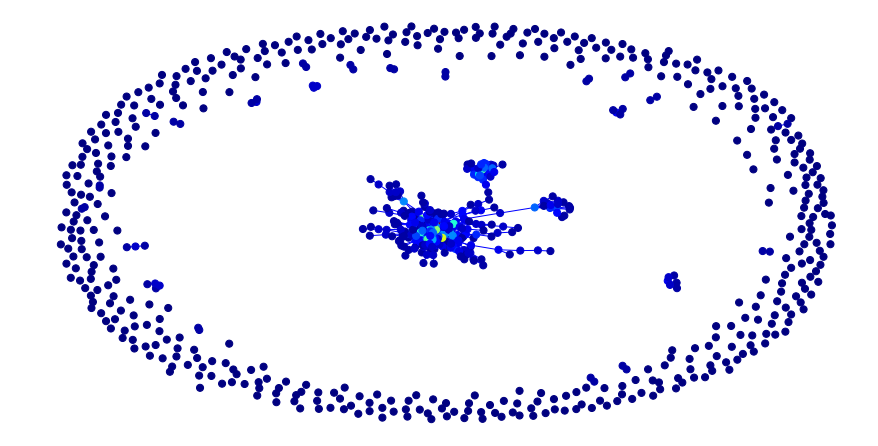

In [297]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

In [298]:
from networkx.algorithms.centrality.betweenness import edge_betweenness_centrality

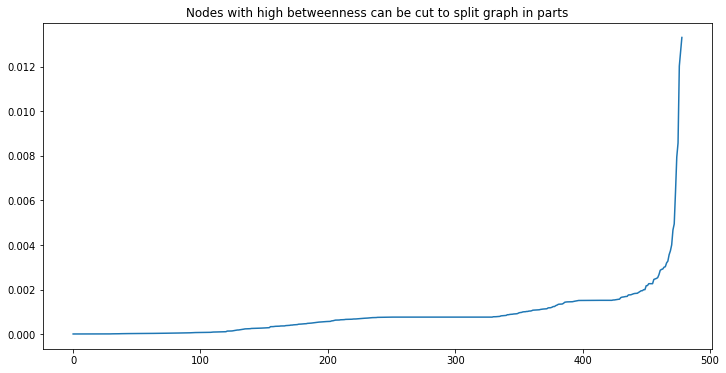

In [299]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

In [300]:
# remove edges with betweenness larger than threshold
thr = 0.0084 # around 70% of the max value
while True:
    bt = networkx.edge_betweenness_centrality(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(networkx.degree(G)):
    if d == 0:
        G.remove_node(n)

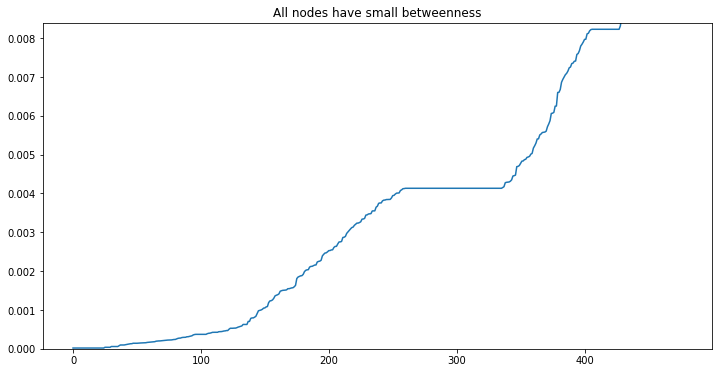

In [301]:
# print new betweenness
bt = networkx.edge_betweenness_centrality(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.0084])
plt.show()

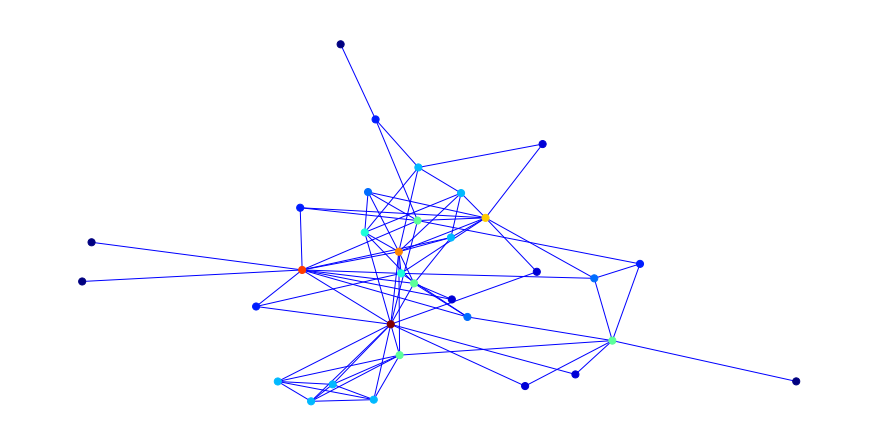

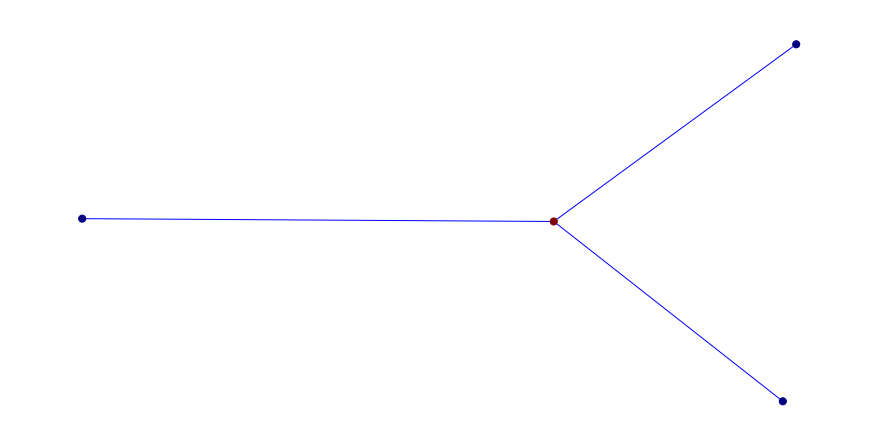

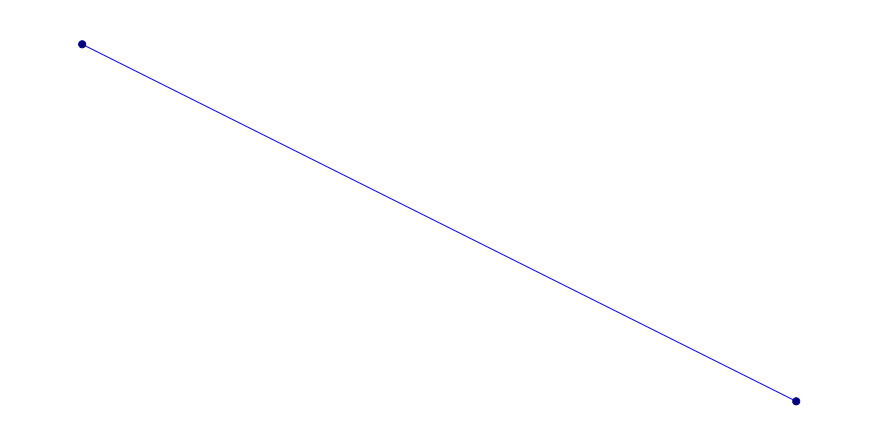

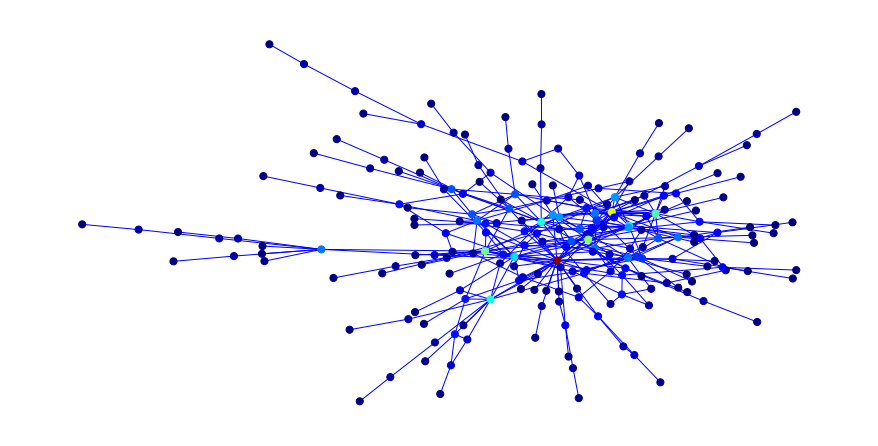

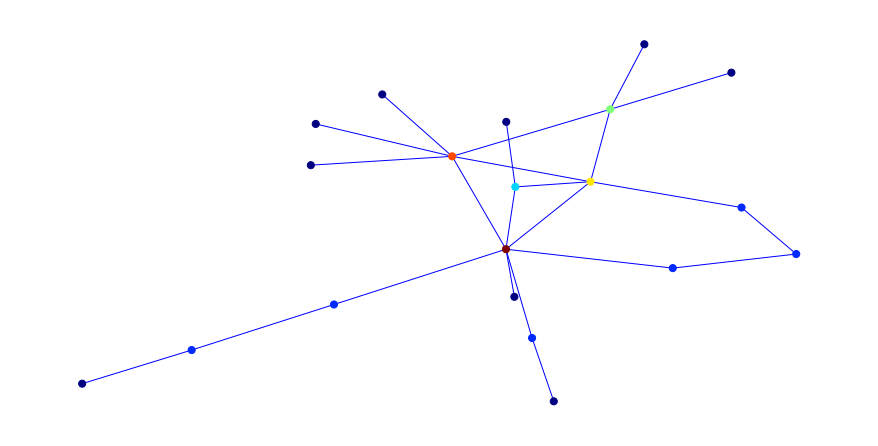

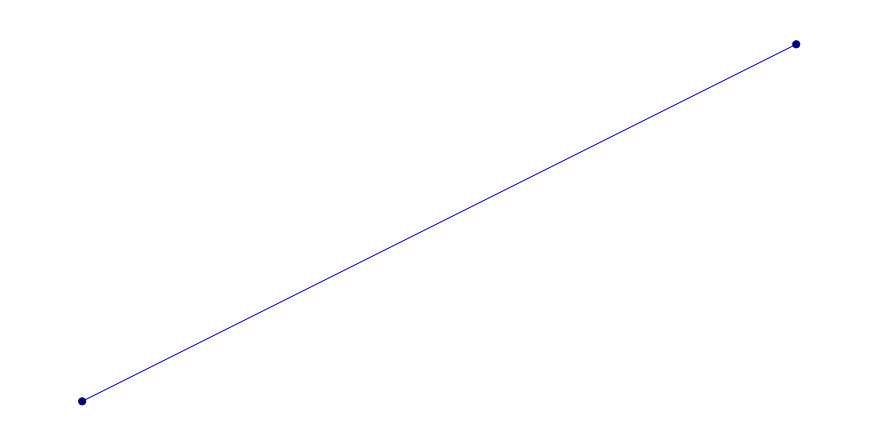

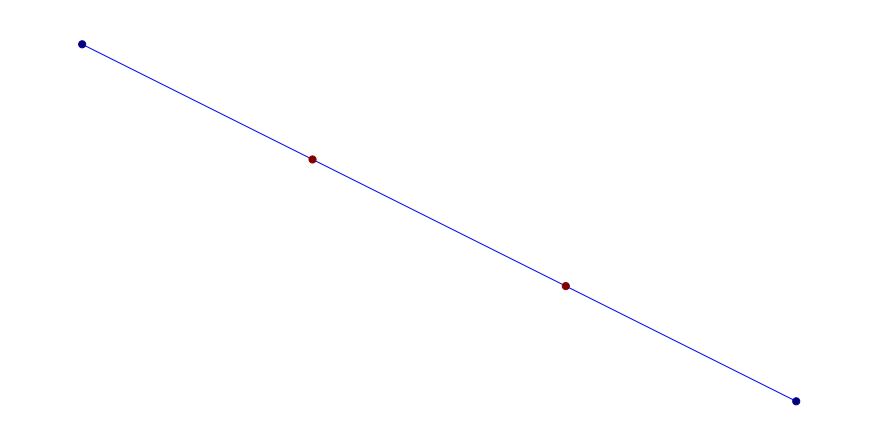

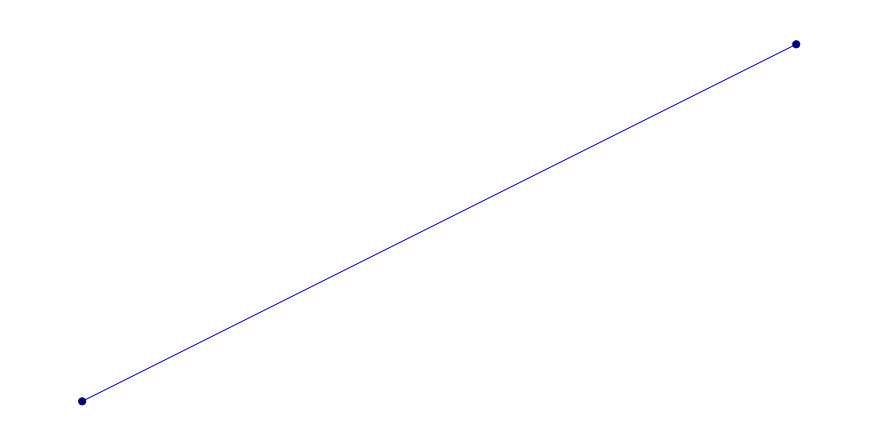

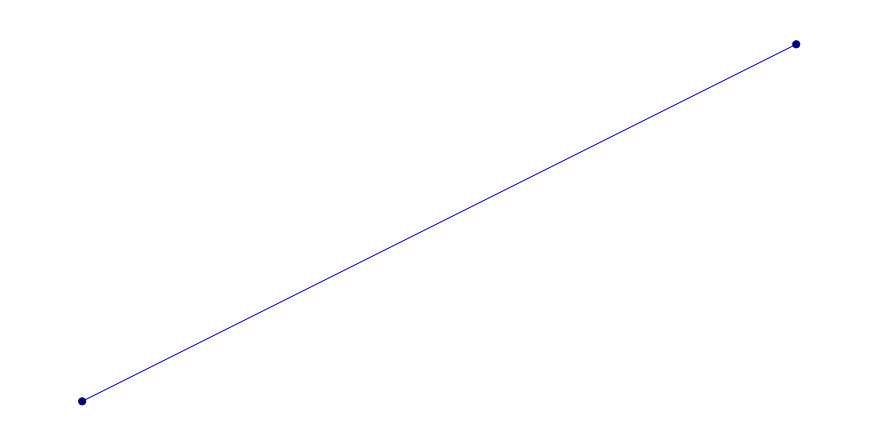

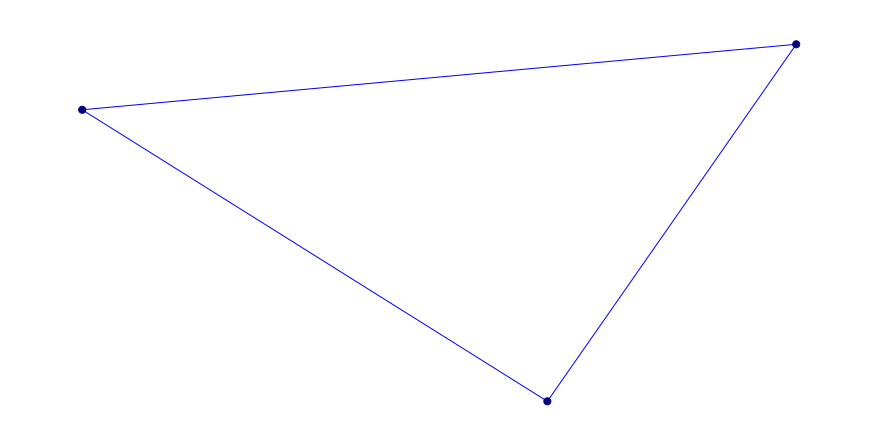

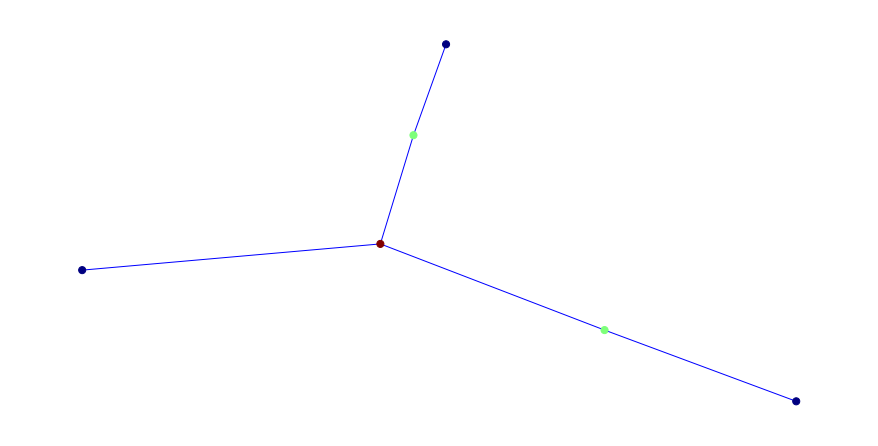

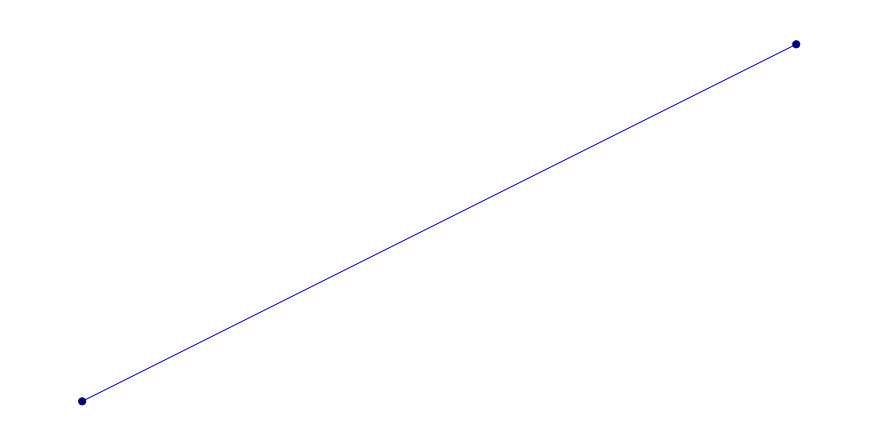

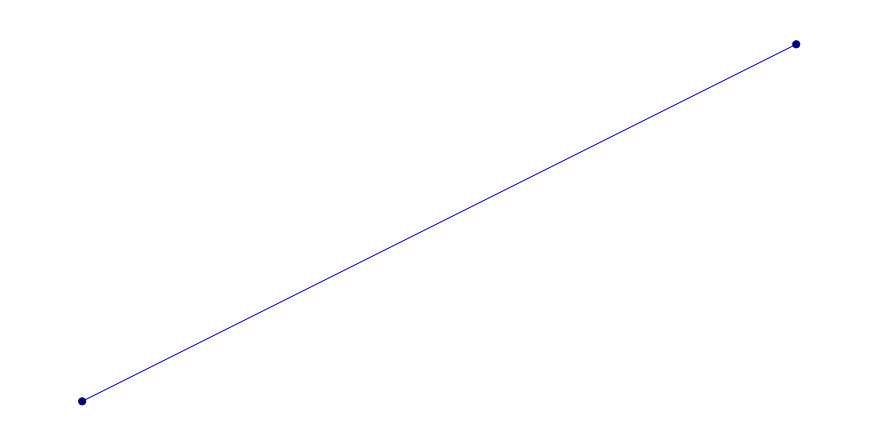

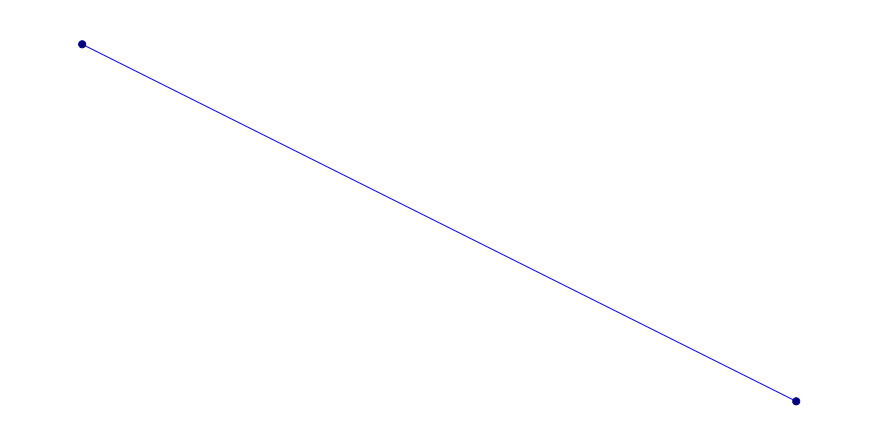

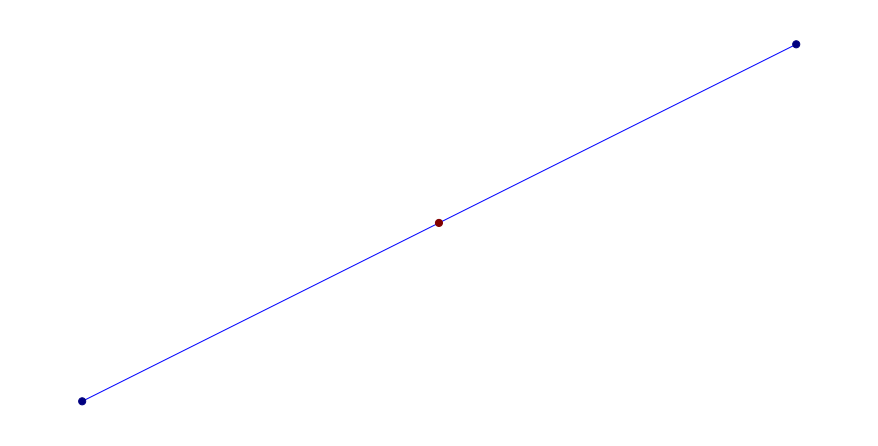

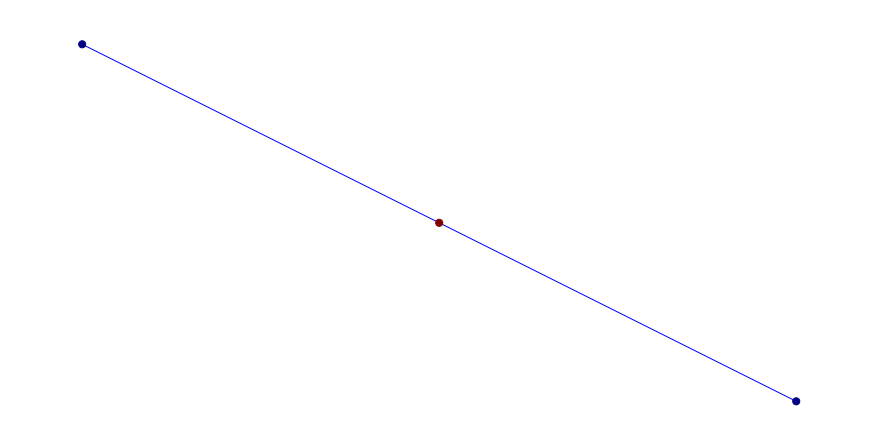

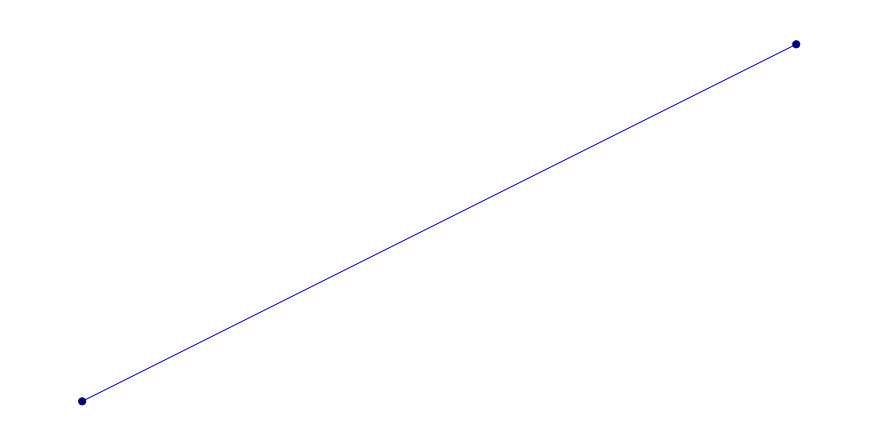

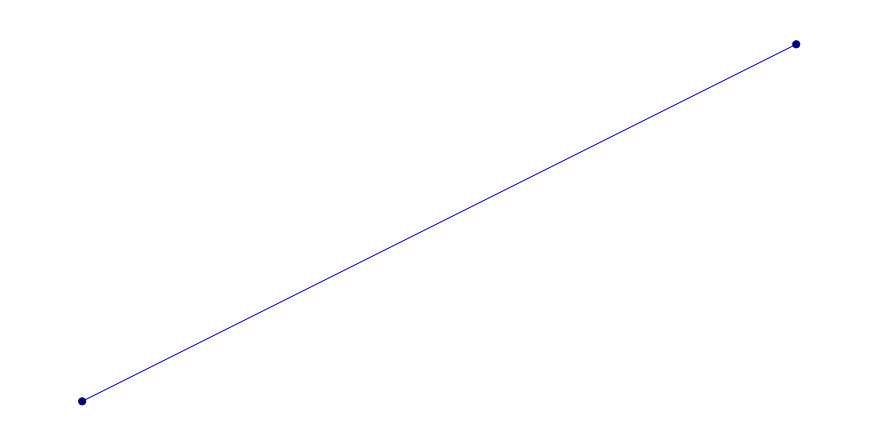

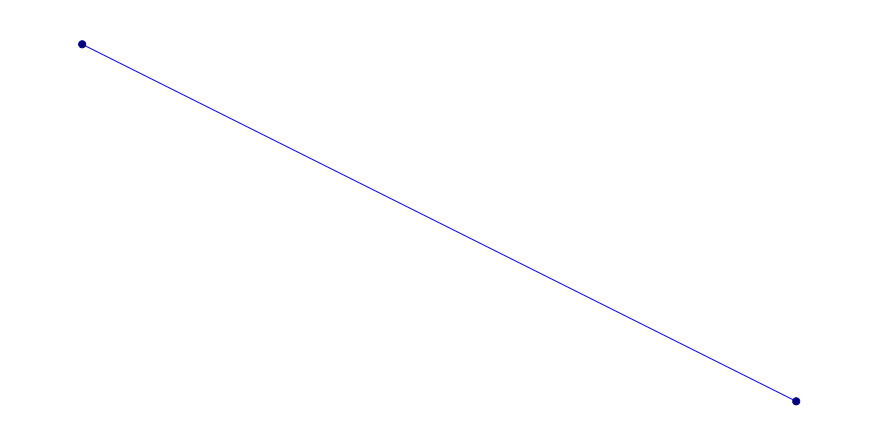

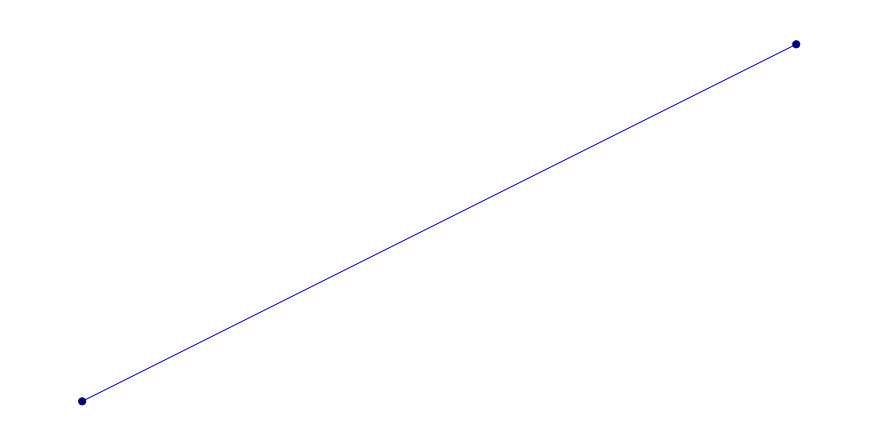

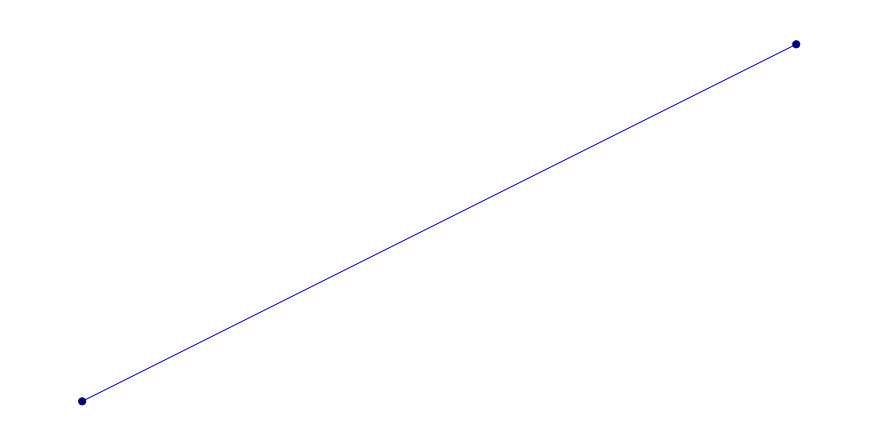

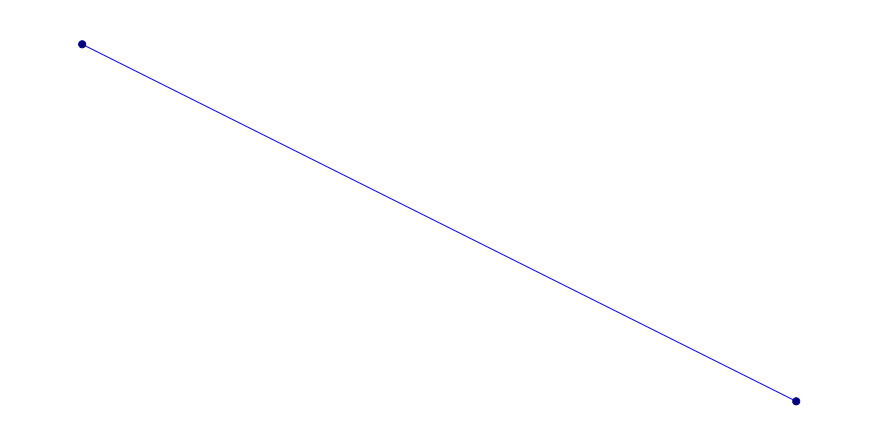

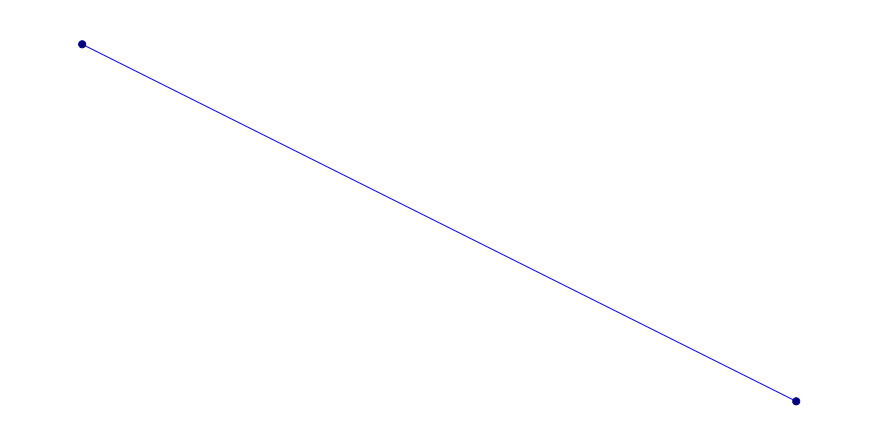

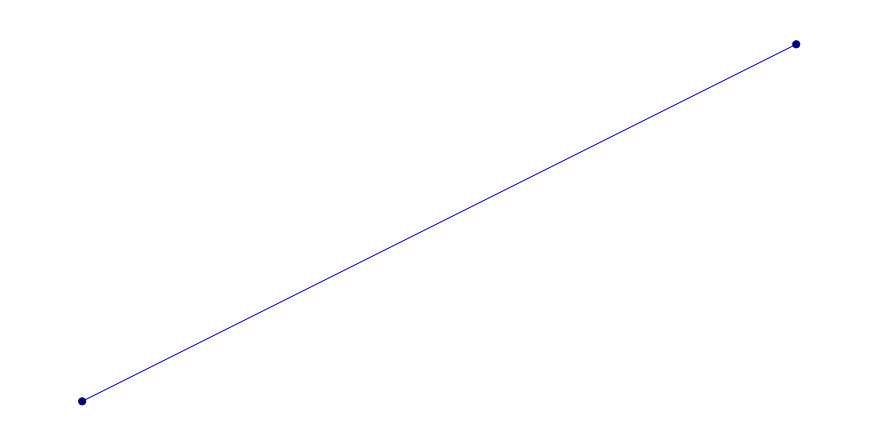

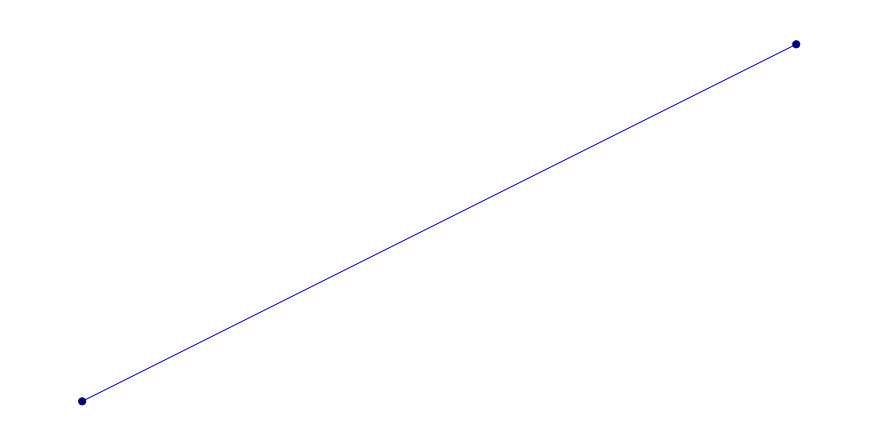

In [302]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

**Changing threshold  to 0.1**

In [303]:
# make the graph
N = 479    # nodes
w1 = 0.1   # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data1:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

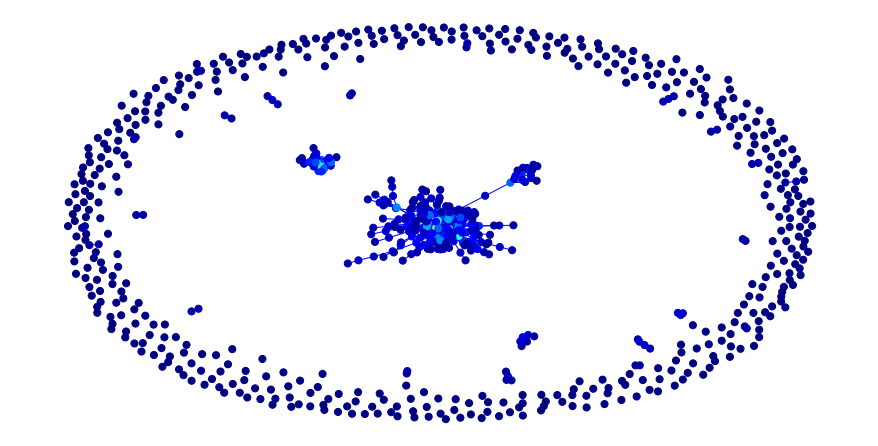

In [304]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

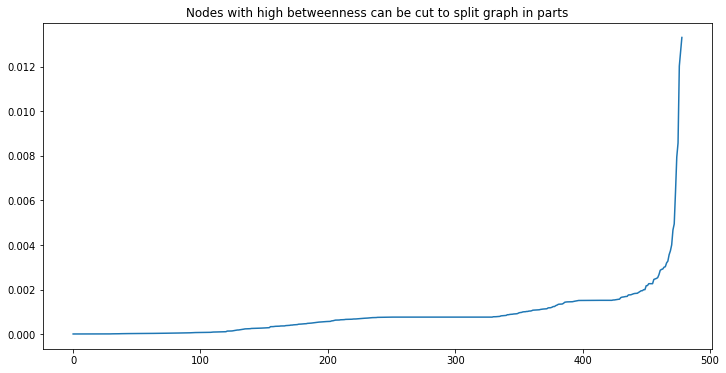

In [305]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

In [306]:
# remove edges with betweenness larger than threshold
thr = 0.0084 # around 70% of the max value
while True:
    bt = networkx.edge_betweenness_centrality(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(networkx.degree(G)):
    if d == 0:
        G.remove_node(n)

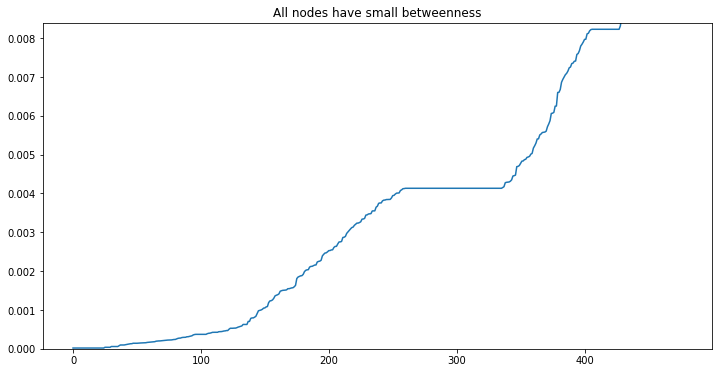

In [307]:
# print new betweenness
bt = networkx.edge_betweenness_centrality(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.0084])
plt.show()

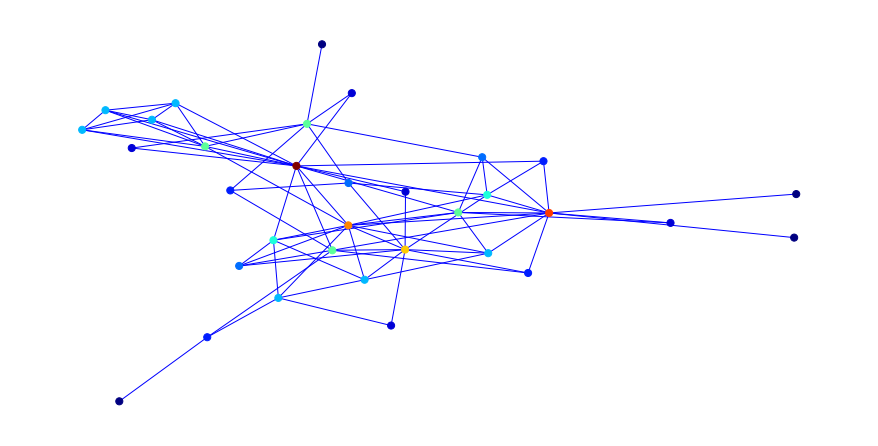

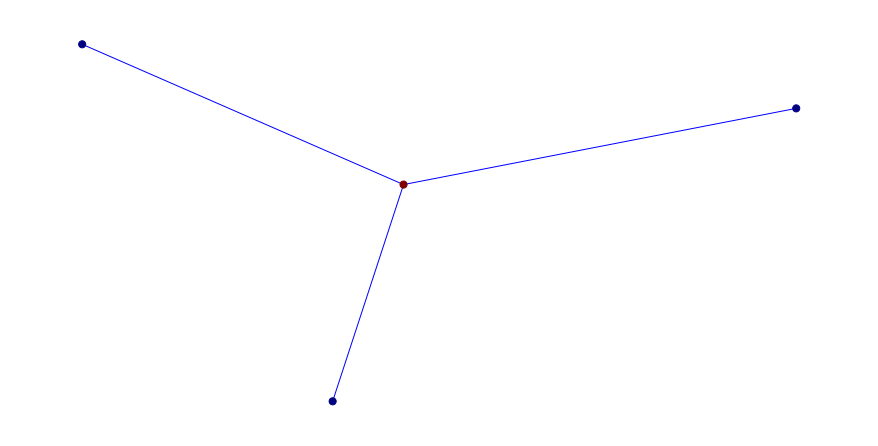

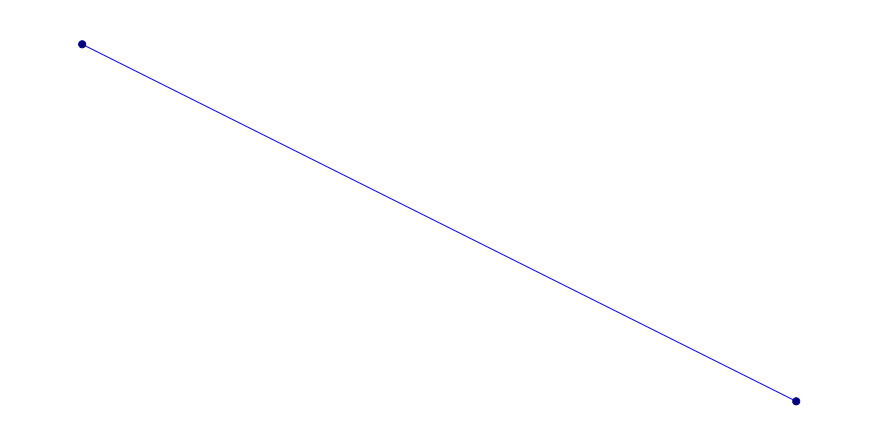

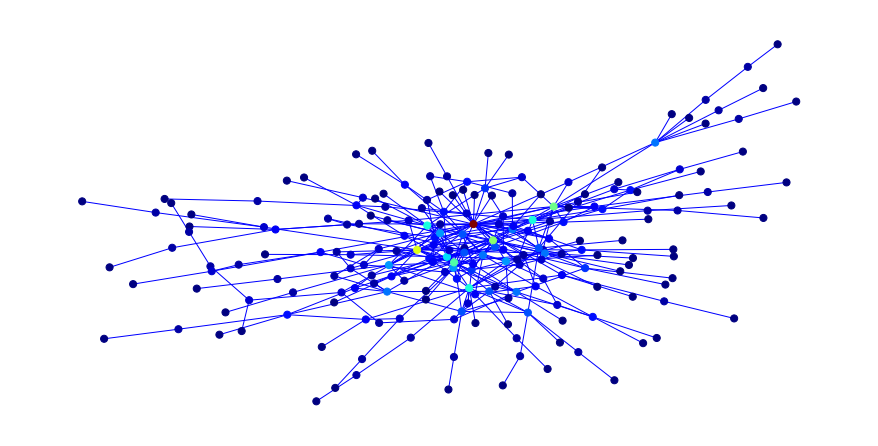

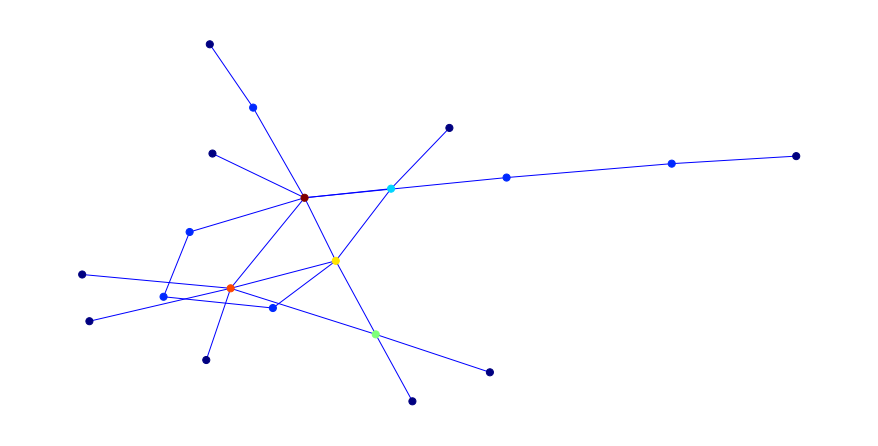

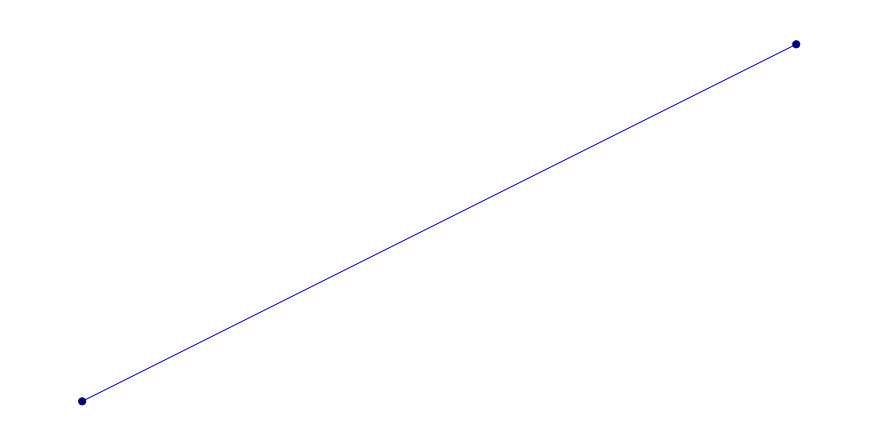

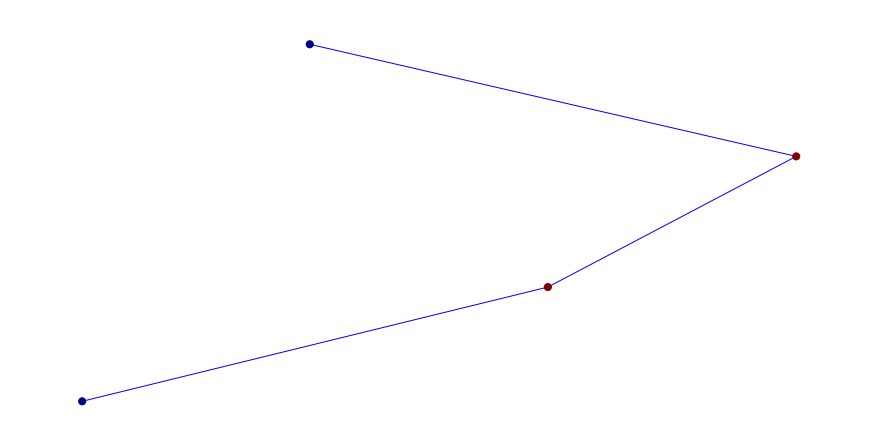

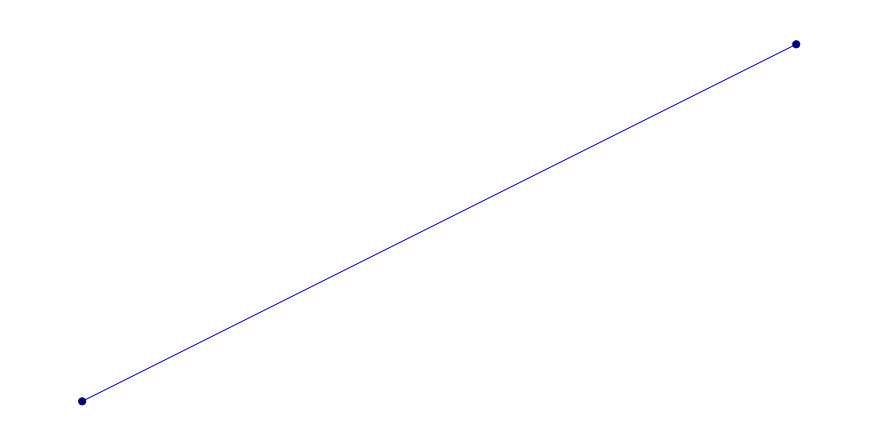

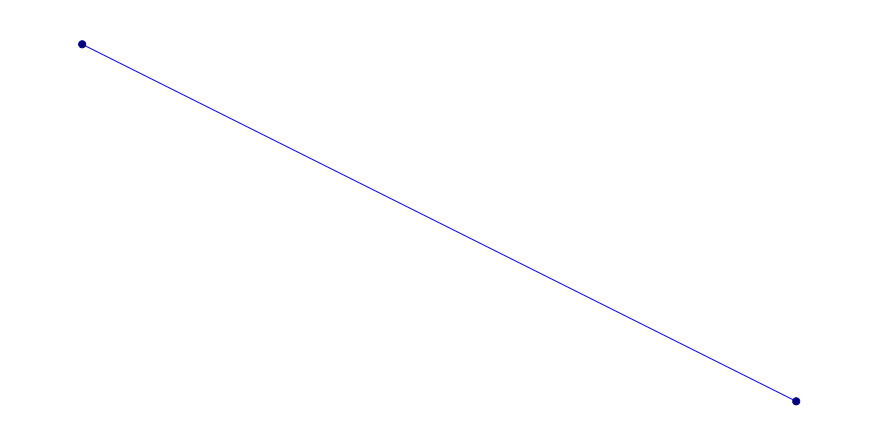

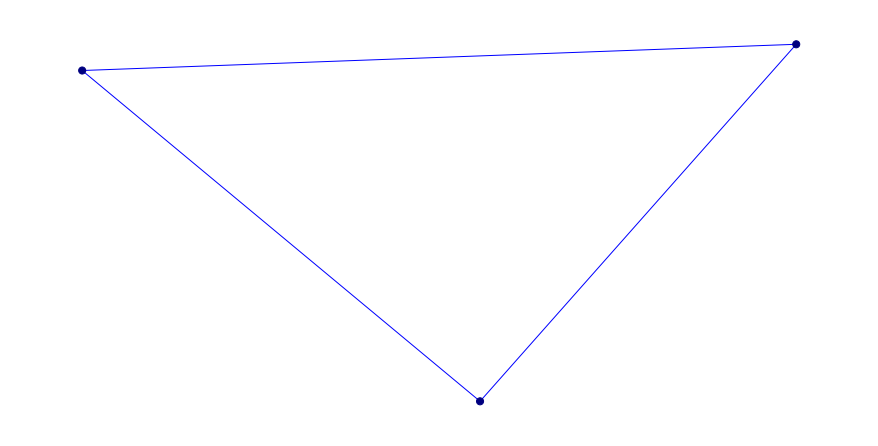

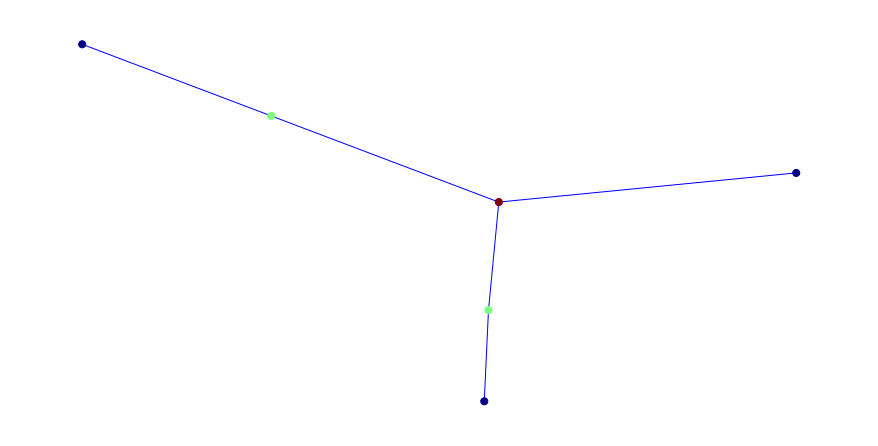

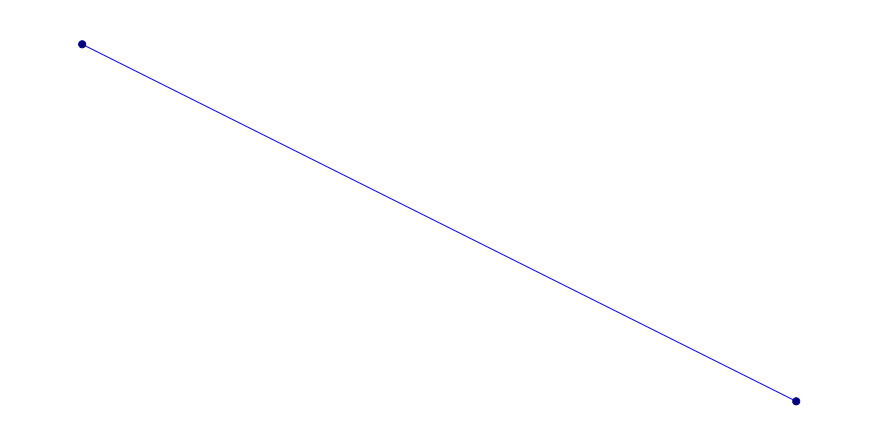

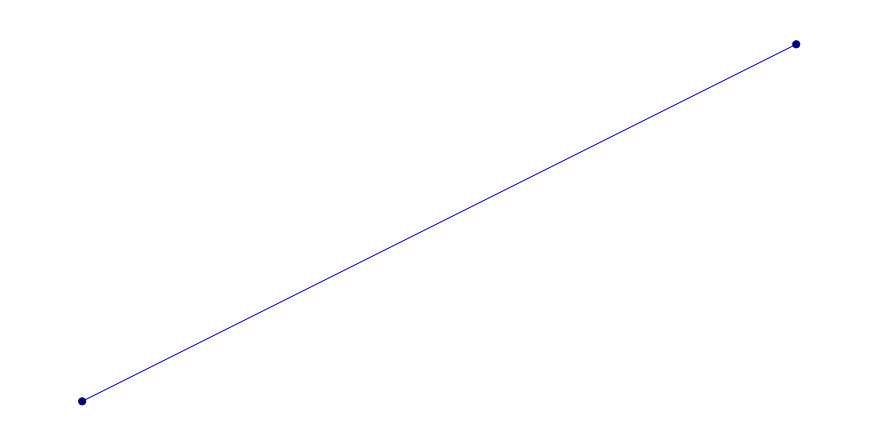

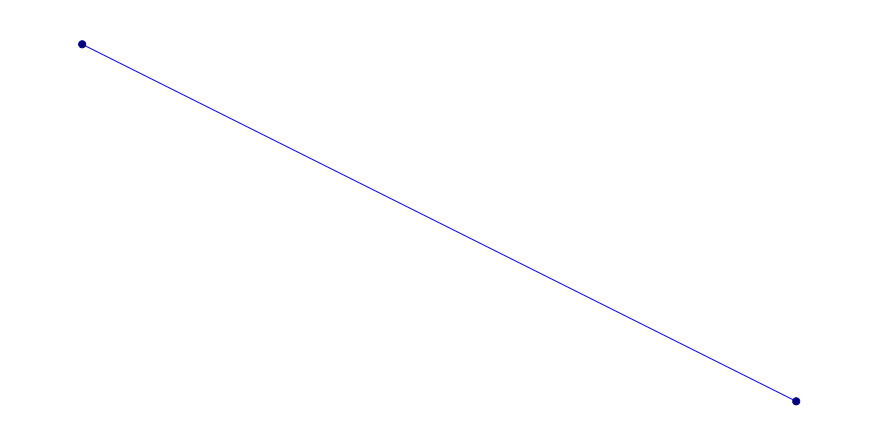

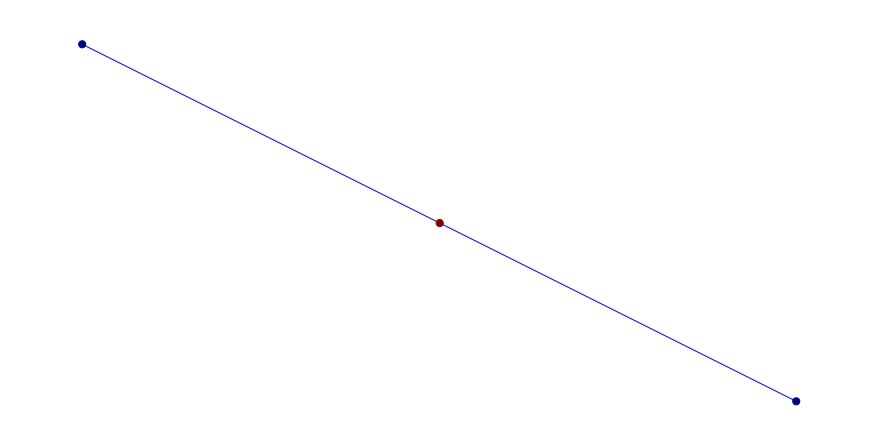

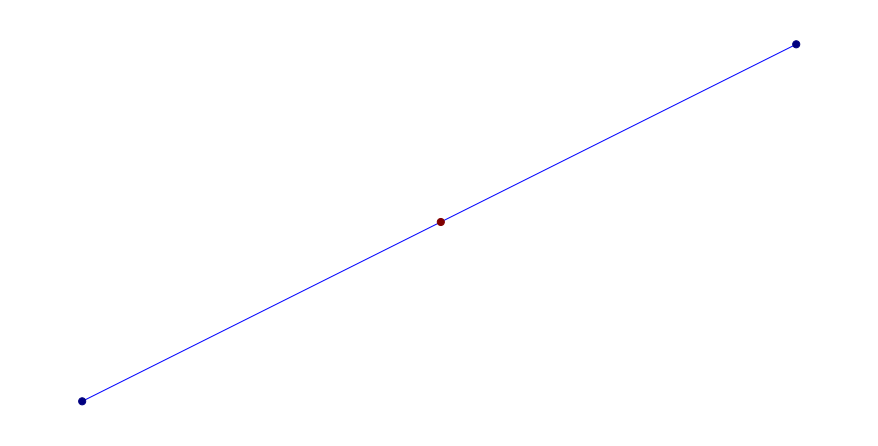

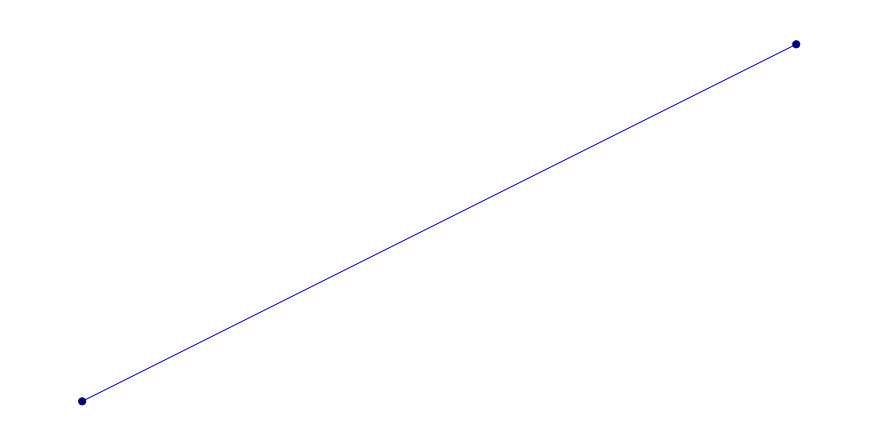

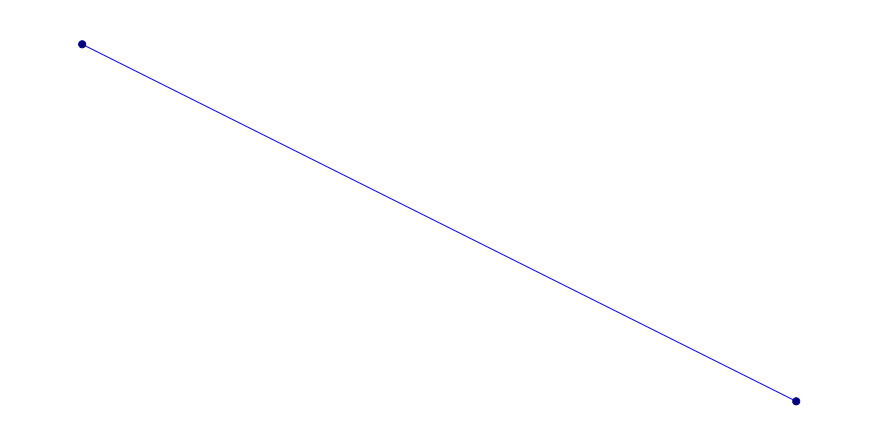

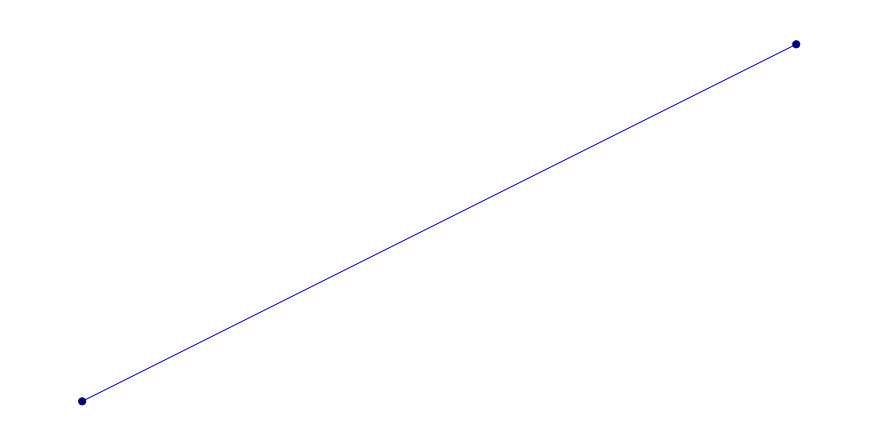

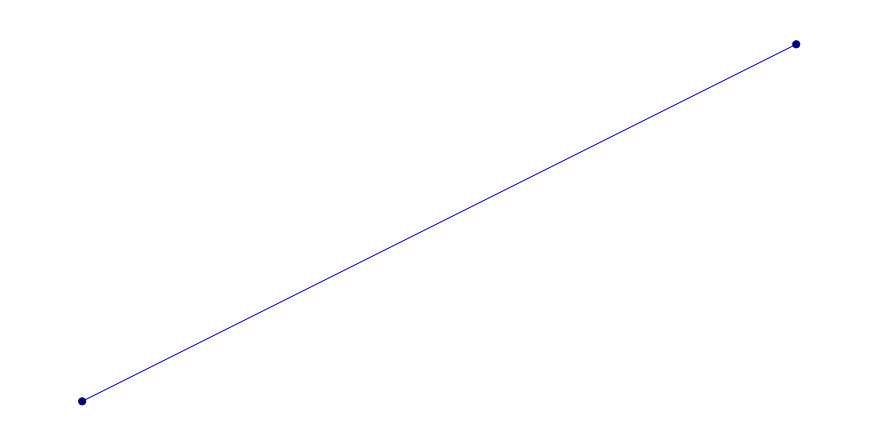

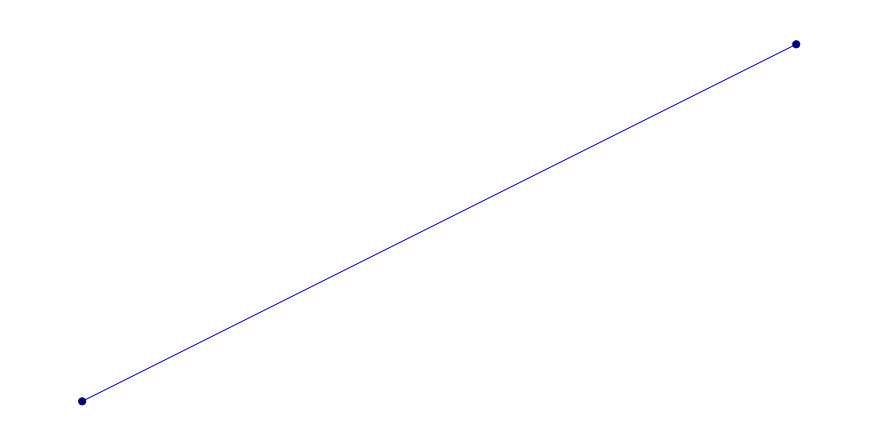

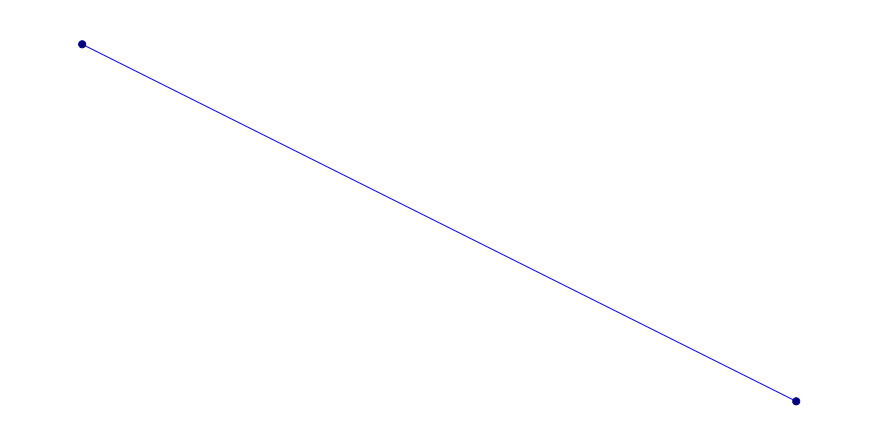

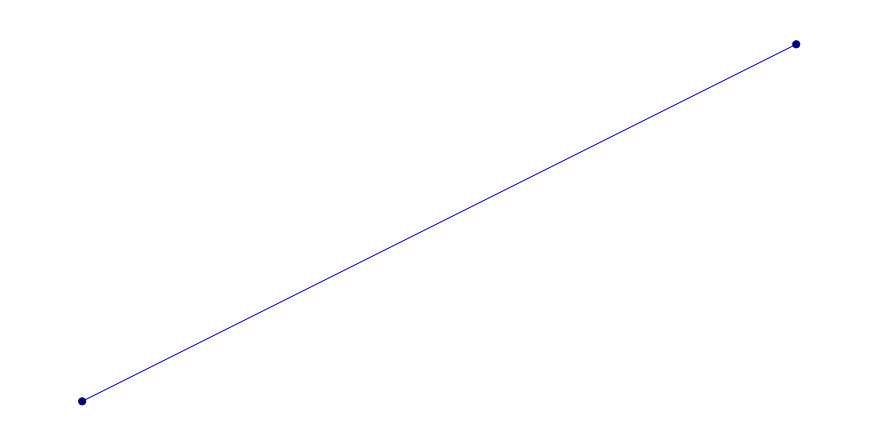

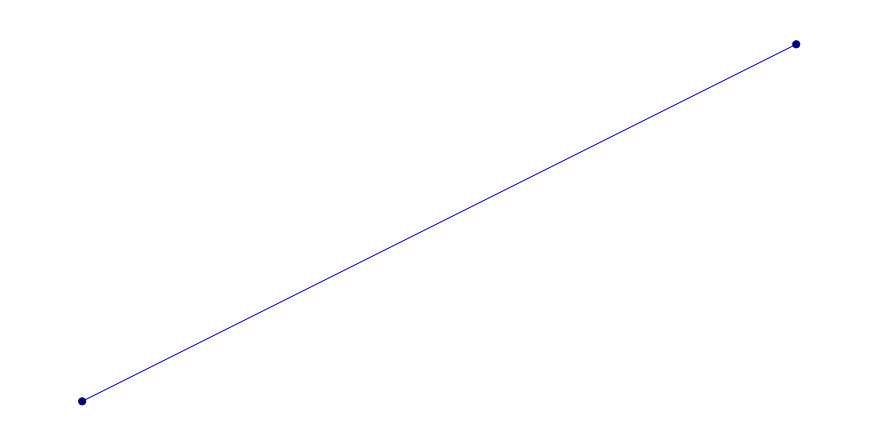

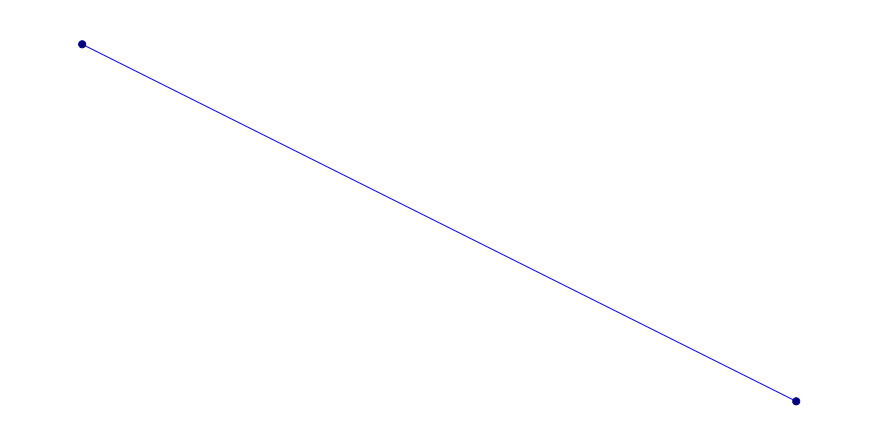

In [308]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

**Finding communities for similar items 2**

In [309]:
data2 = np.loadtxt("similar_pairs2.txt").astype(np.int)
print(data2)

[[875  94   1]
 [875 296   1]
 [875  96   1]
 [ 94 296   1]
 [ 94  96   1]
 [519 735   1]
 [296  96   1]]


<ipython-input-309-c0008546b83d>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2 = np.loadtxt("similar_pairs2.txt").astype(np.int)


In [310]:
# make the graph
N = 5    # nodes
w1 = 0.1  # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data2:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

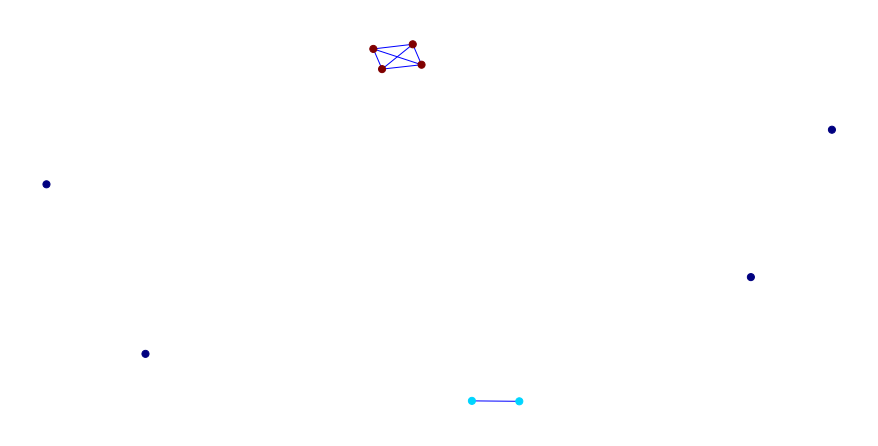

In [311]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

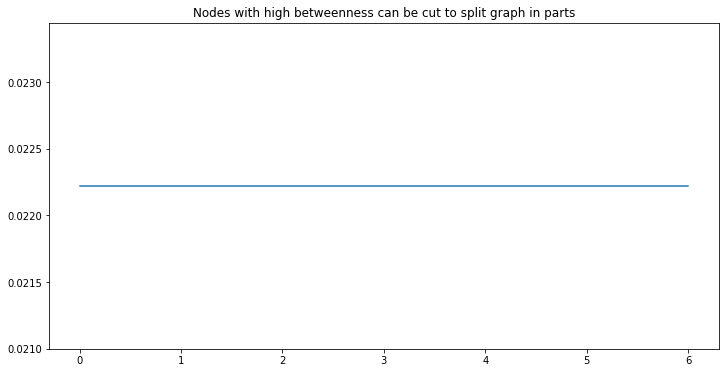

In [312]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

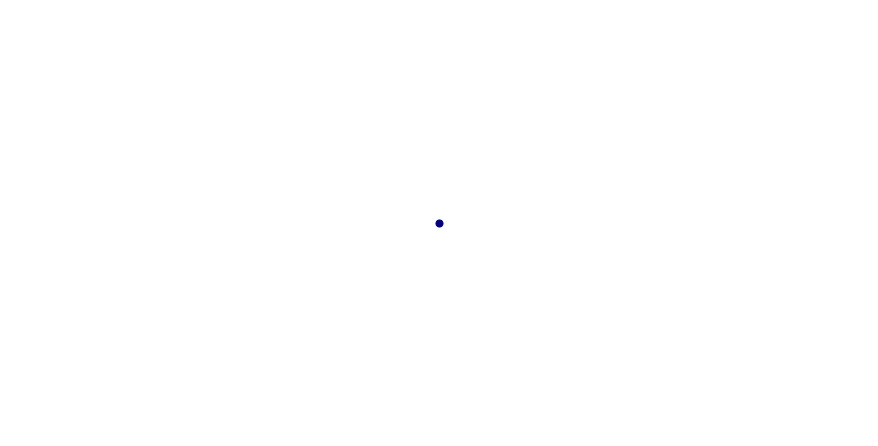

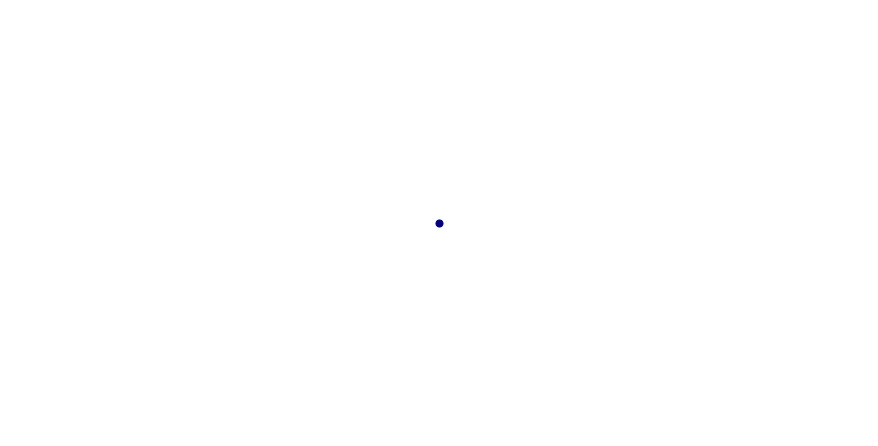

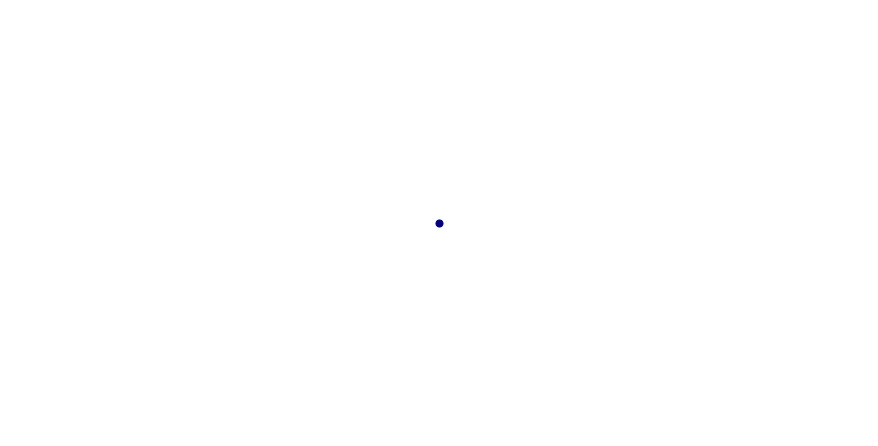

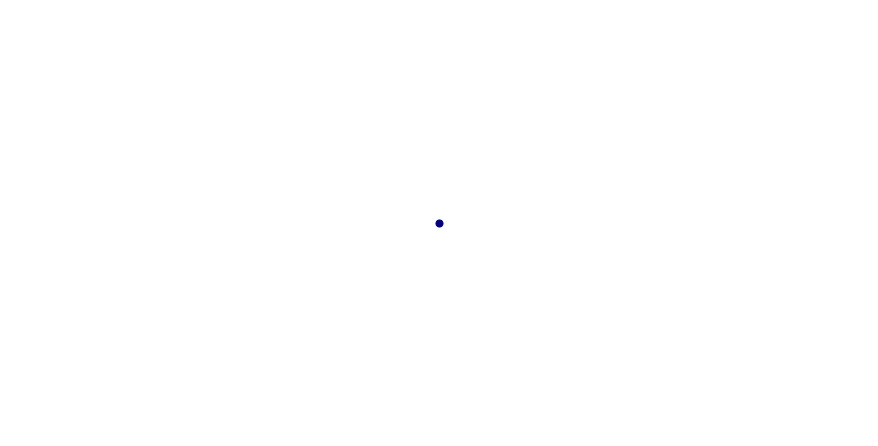

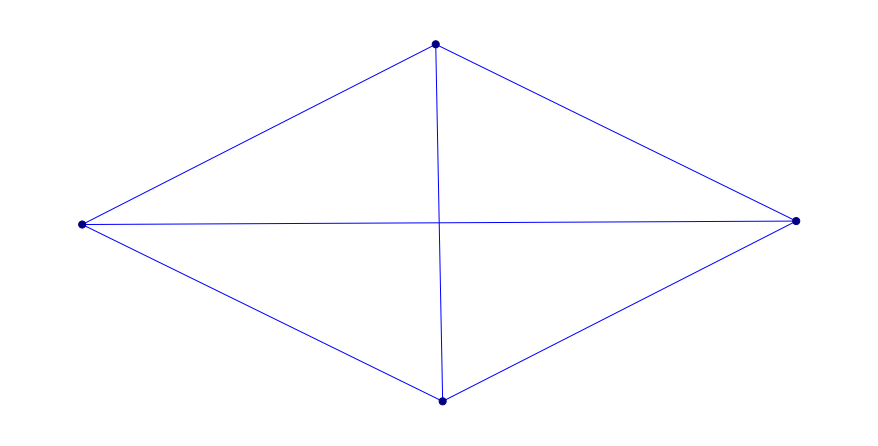

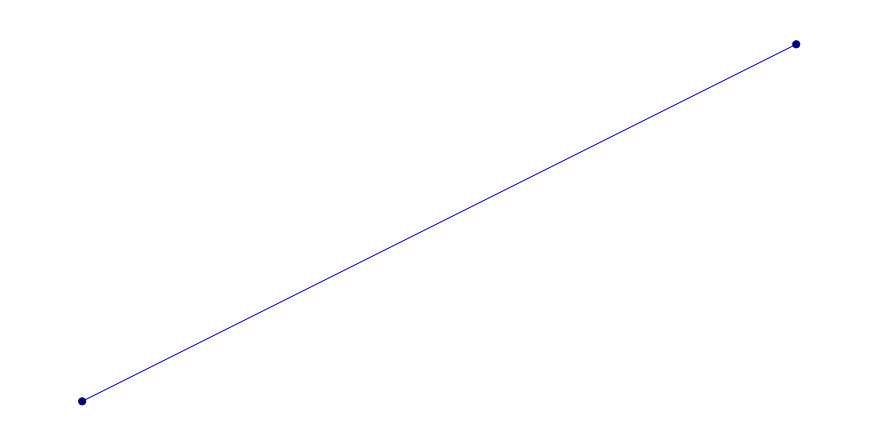

In [313]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

**It was a small network so we just got 7 small subgraphs. 

more complex the network we can make better network graphs.**

**Changing threshold to 0.05**

In [314]:
# make the graph
N = 5    # nodes
w1 = 0.05  # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data2:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

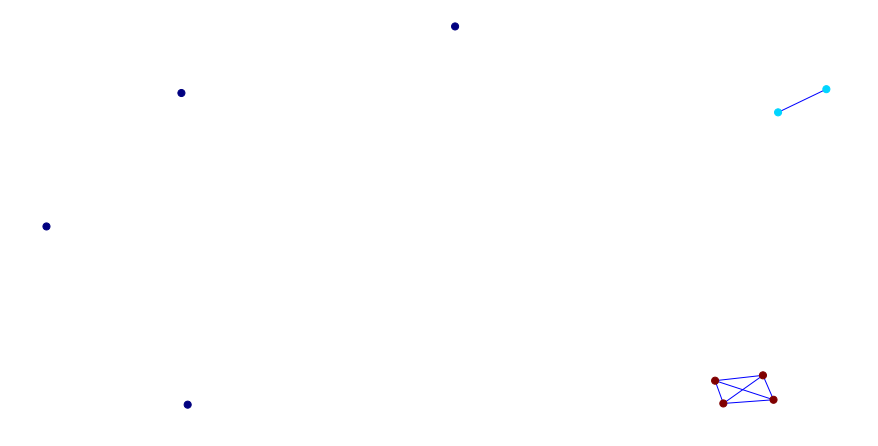

In [315]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

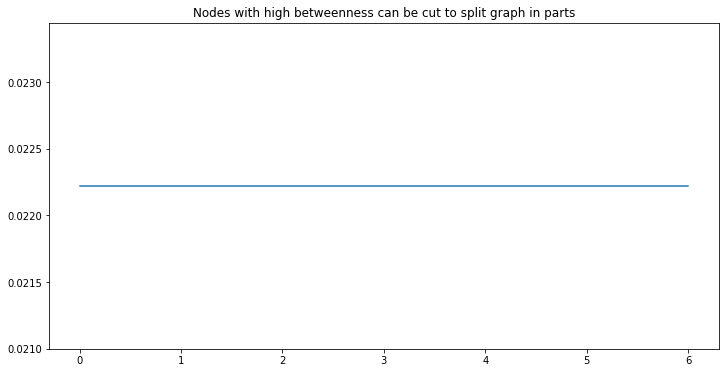

In [316]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

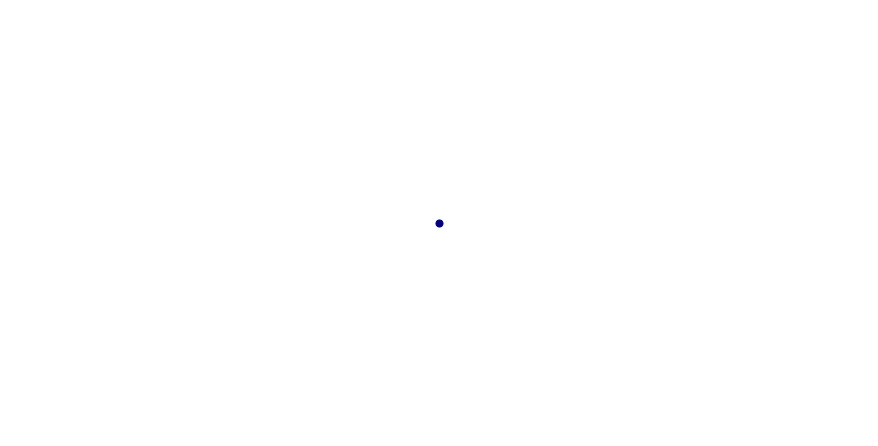

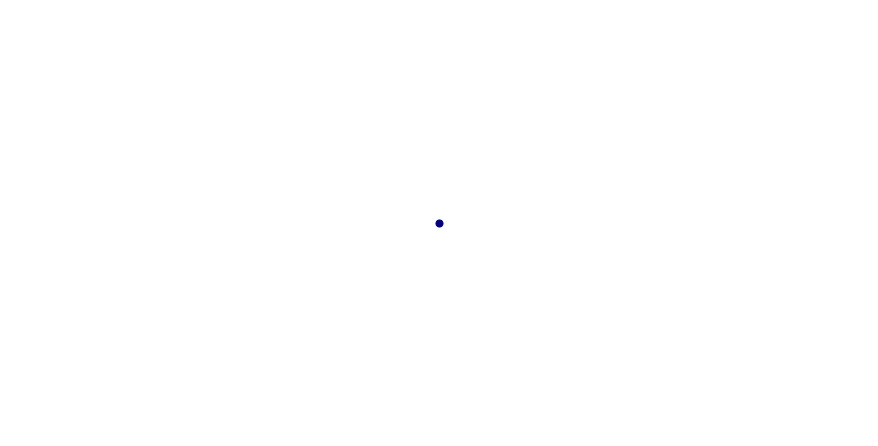

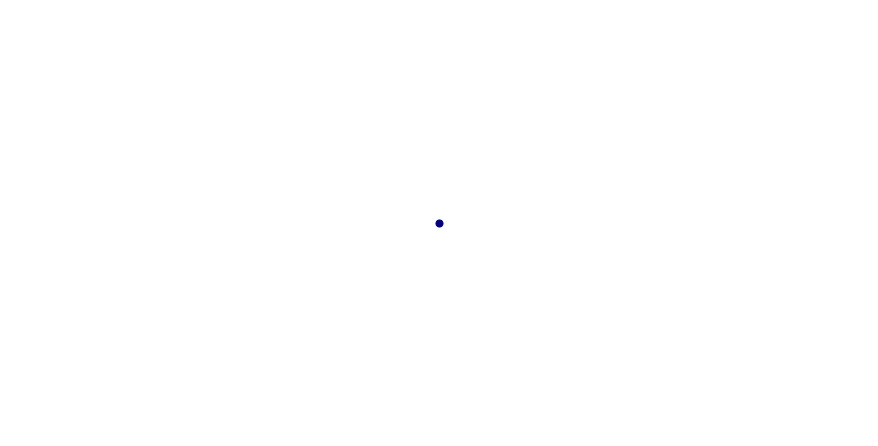

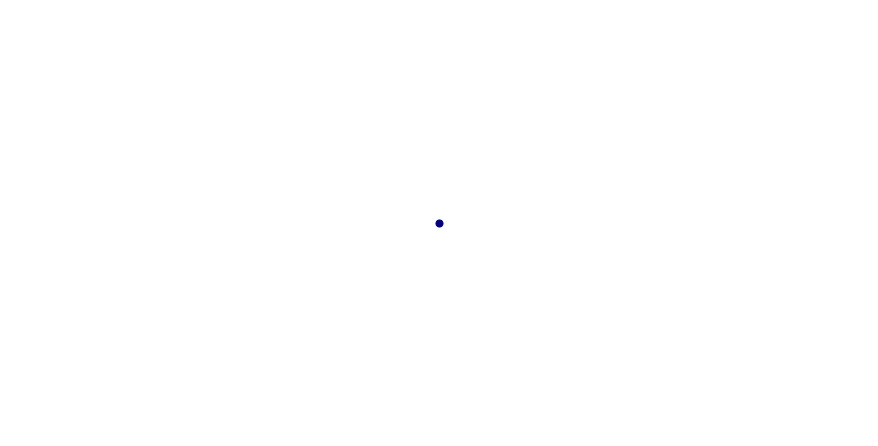

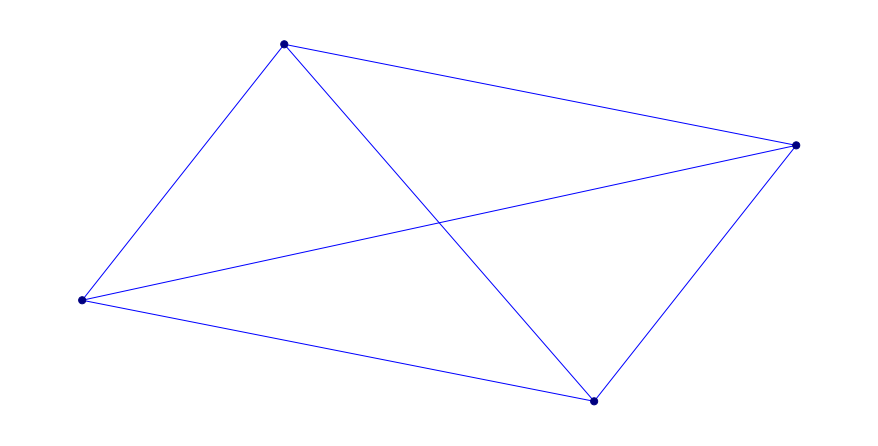

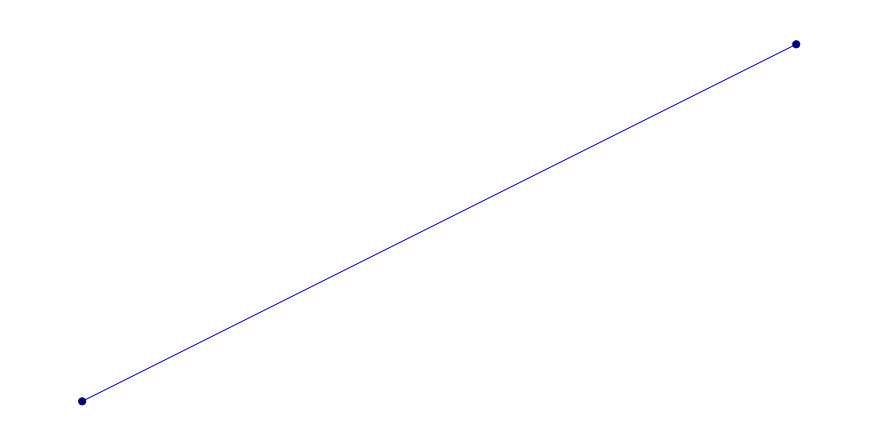

In [317]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

###**Finding communities for frequent items**

**Finding communities for frequent_itemsets with threshold 0.1**

In [318]:
data3 = np.loadtxt("/content/frequent_itemsets_b.txt").astype(np.int)
print(data3)

[[ 1 53]
 [ 2 66]
 [ 3 57]
 [ 4 53]
 [ 5 60]]


<ipython-input-318-c3e9f0d434a9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data3 = np.loadtxt("/content/frequent_itemsets_b.txt").astype(np.int)


In [319]:
# make the graph
N = 5    # nodes
w1 = 0.1   # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, w in data3:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

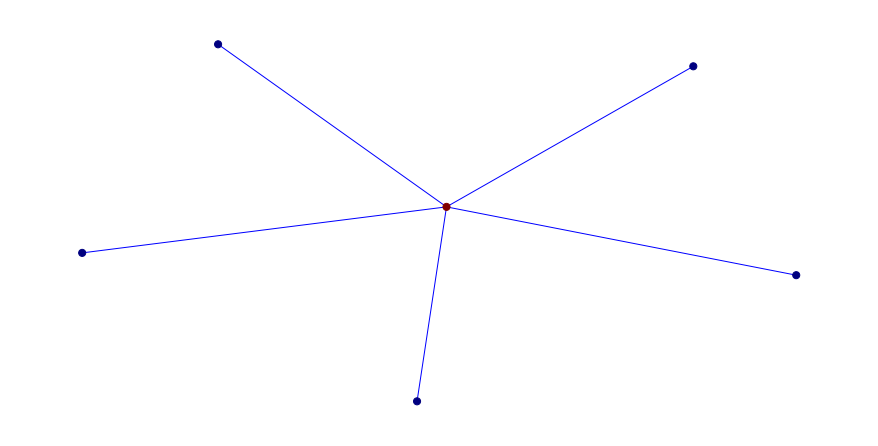

In [320]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

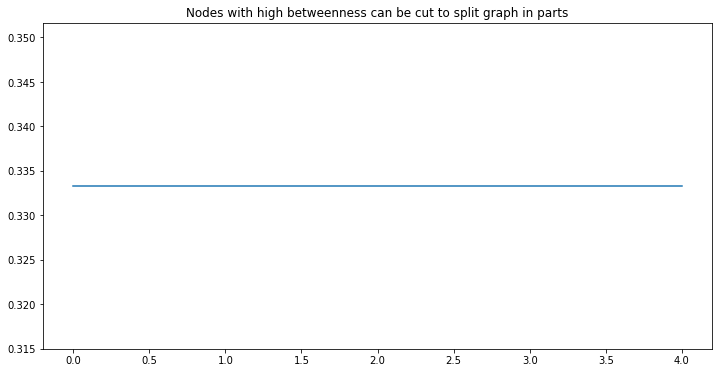

In [321]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.40])
plt.show()

In [322]:
# remove edges with betweenness larger than threshold
thr = 0.28 # around 70% of the max value
while True:
    bt = networkx.edge_betweenness_centrality(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(networkx.degree(G)):
    if d == 0:
        G.remove_node(n)

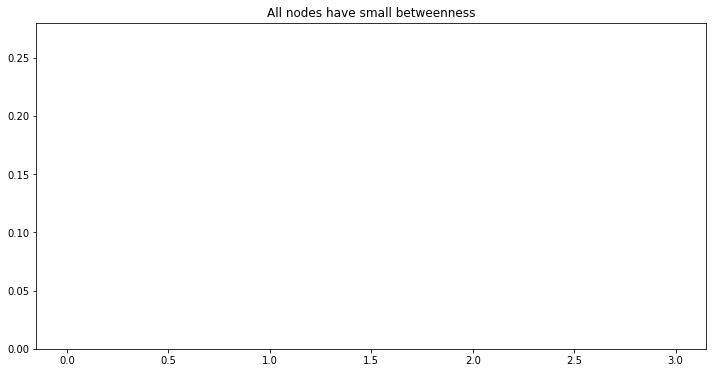

In [323]:
# print new betweenness
bt = networkx.edge_betweenness_centrality(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.28])
plt.show()

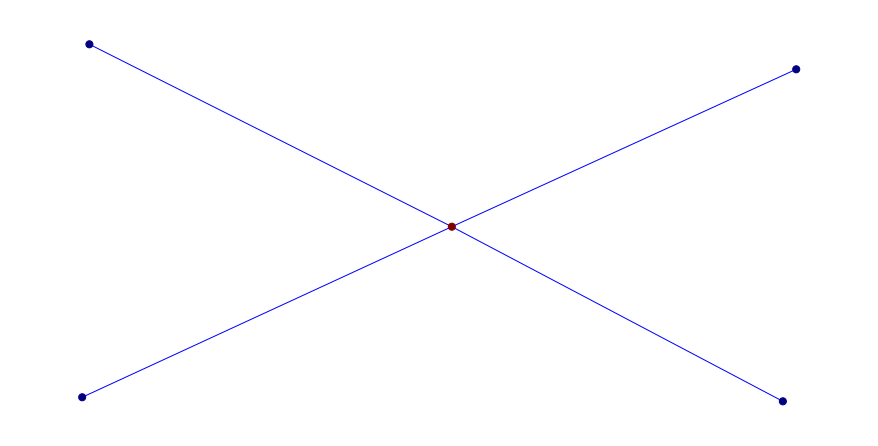

In [324]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

In [325]:
###changing threshold=0.05

In [326]:
# make the graph
N = 5    # nodes
w1 = 0.05   # threshold's weight 

G = networkx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, w in data3:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

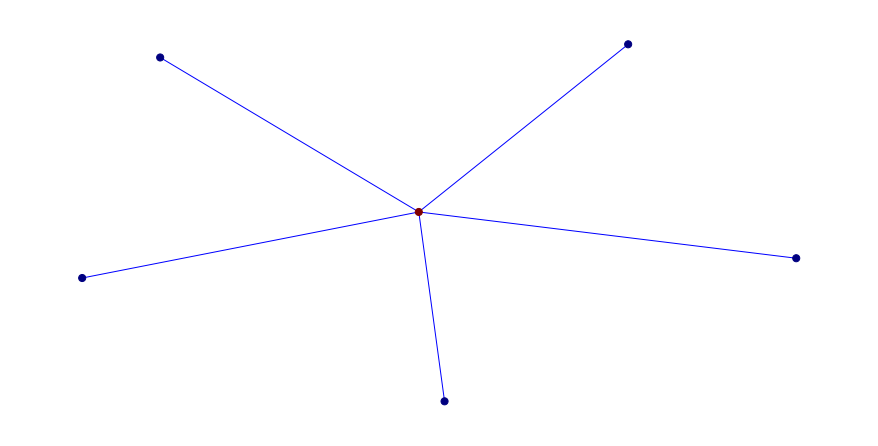

In [327]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = networkx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
networkx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

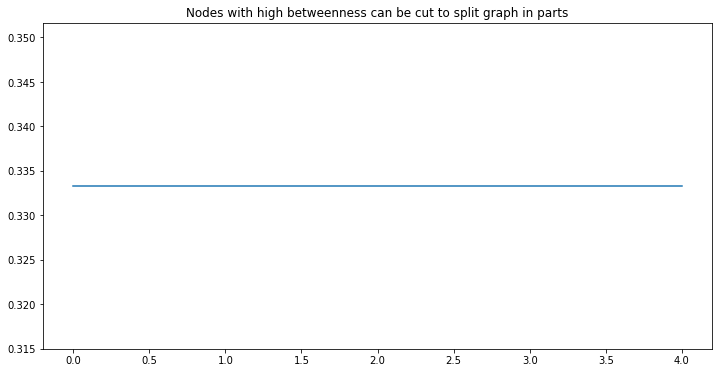

In [328]:
# print betweenness
bt = list(networkx.edge_betweenness_centrality(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.40])
plt.show()

In [329]:
# remove edges with betweenness larger than threshold
thr = 0.245 # around 70% of the max value
while True:
    bt = networkx.edge_betweenness_centrality(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(networkx.degree(G)):
    if d == 0:
        G.remove_node(n)

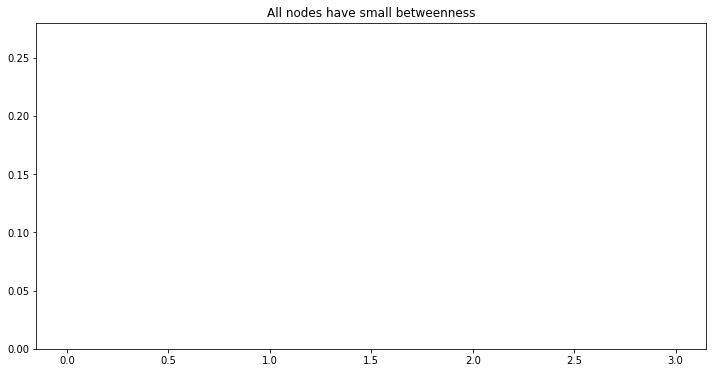

In [330]:
# print new betweenness
bt = networkx.edge_betweenness_centrality(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.28])
plt.show()

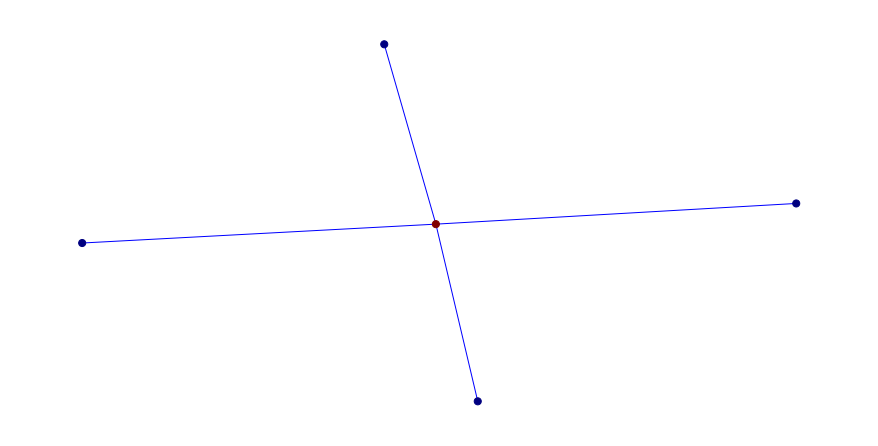

In [331]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(networkx.degree(G1)).values())
    networkx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

**We have less frequent items 5 with >50 occurances, Hence we found less betweenness between frequent items**